1. Для заданных функций  
   $$ e^{\frac{-x}{2}}; \sin 3x; \; cos^2(5x); \sum\limits_{n=0}^{\infty} \frac{x^{2n}}{(2n)!} $$
сгенерируйте сеточные функции $\{y_k\}_{k=1,\ldots,N}$ на отрезках $[0; \frac{\pi}{2}]$; $[2; 10]$; $[-3;3]$. Для генерации значений сеточных функций используйте равномерную сетку с шагом h(возьмите h = 0.01; 0.005; 0.001). Постройте графики исходных функций и сеточных функций

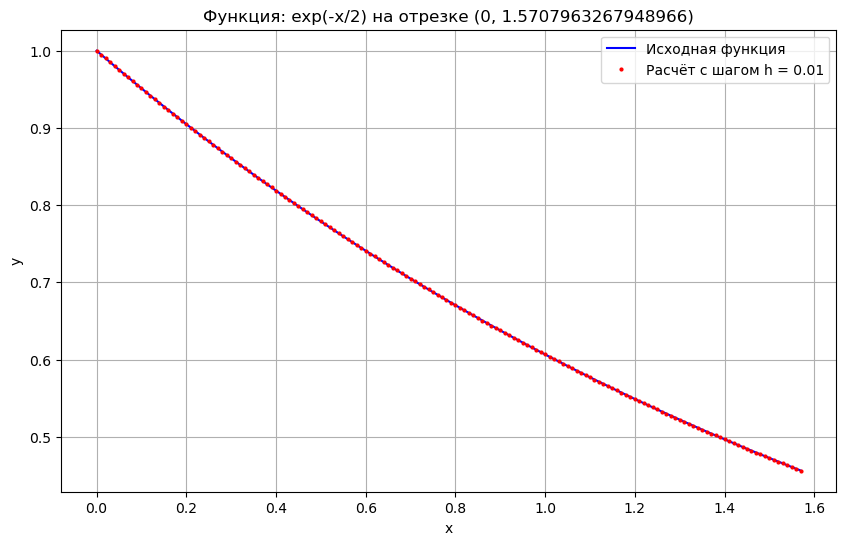

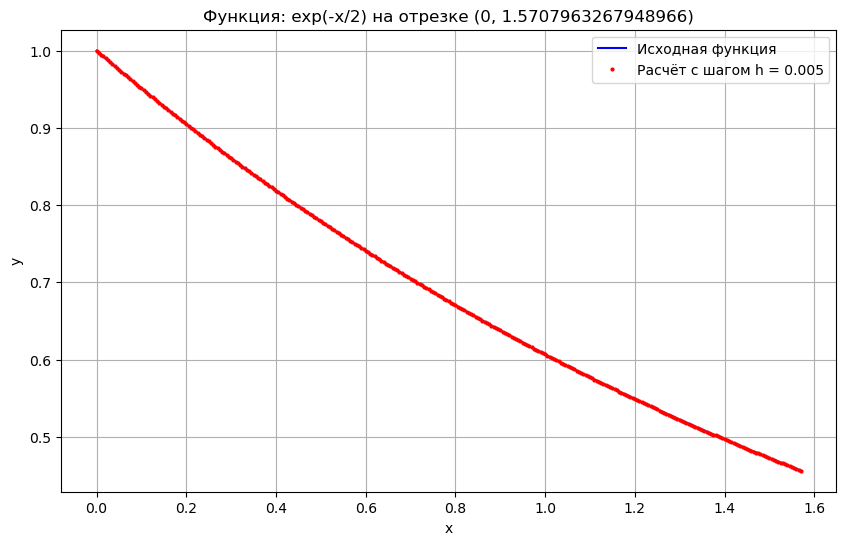

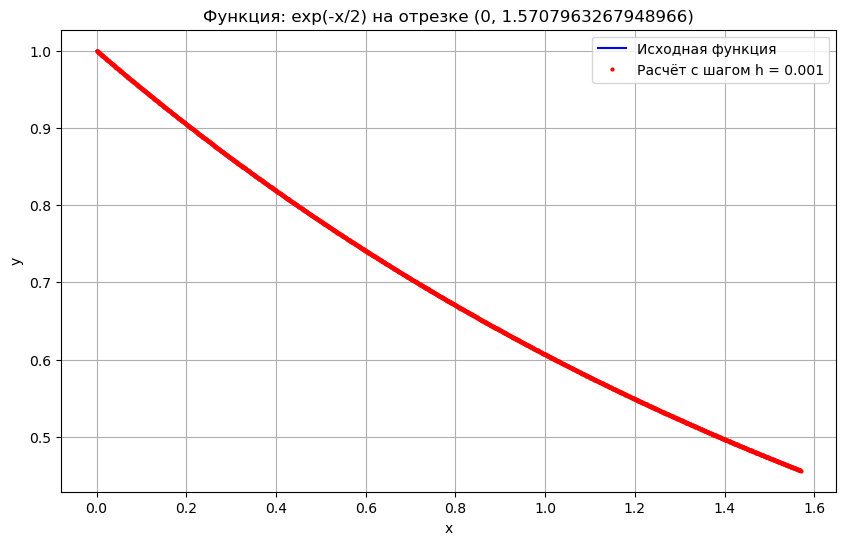

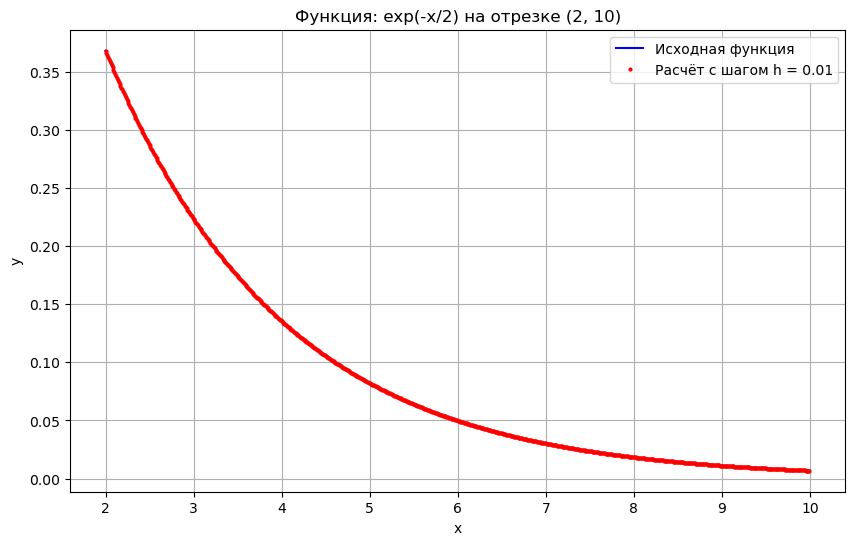

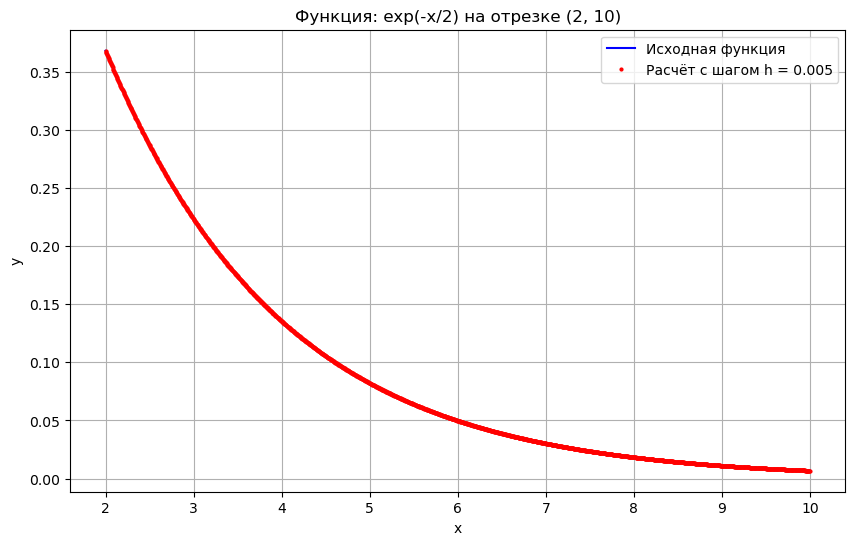

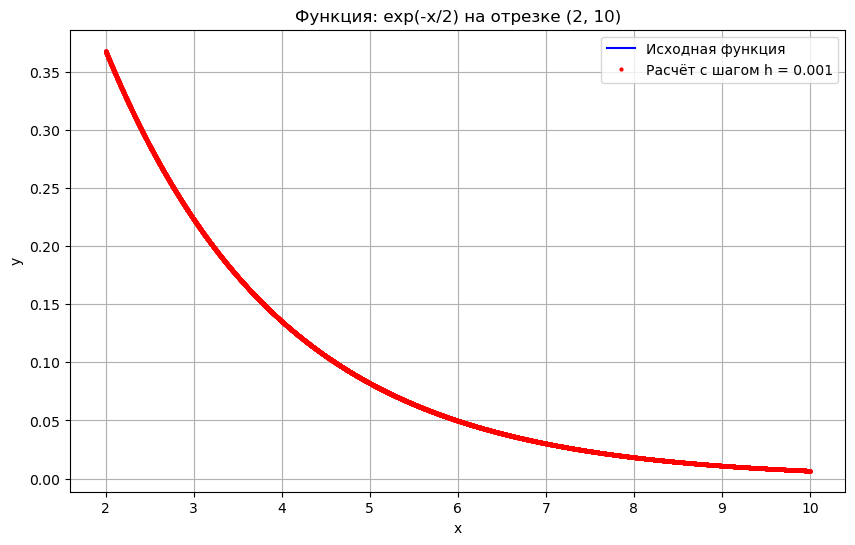

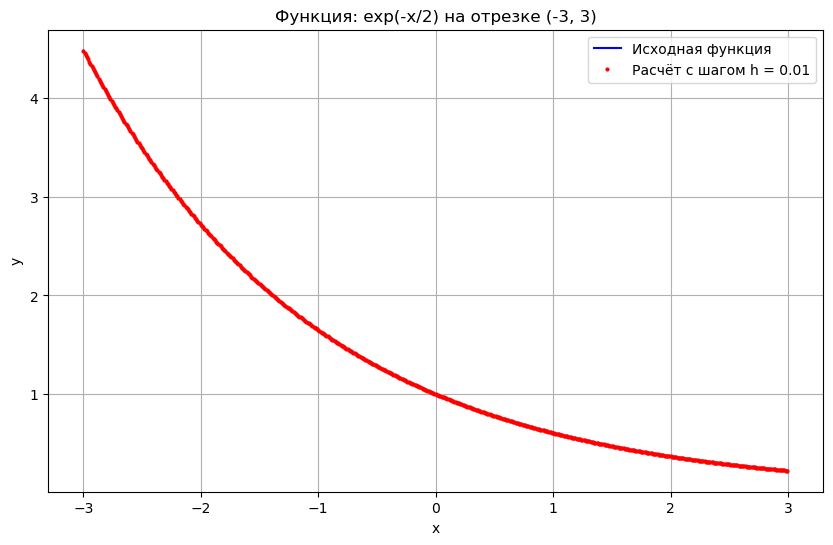

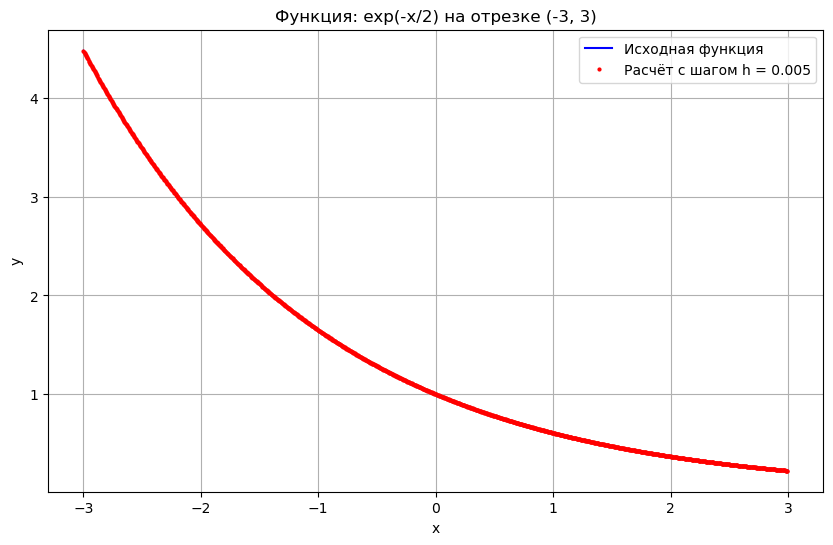

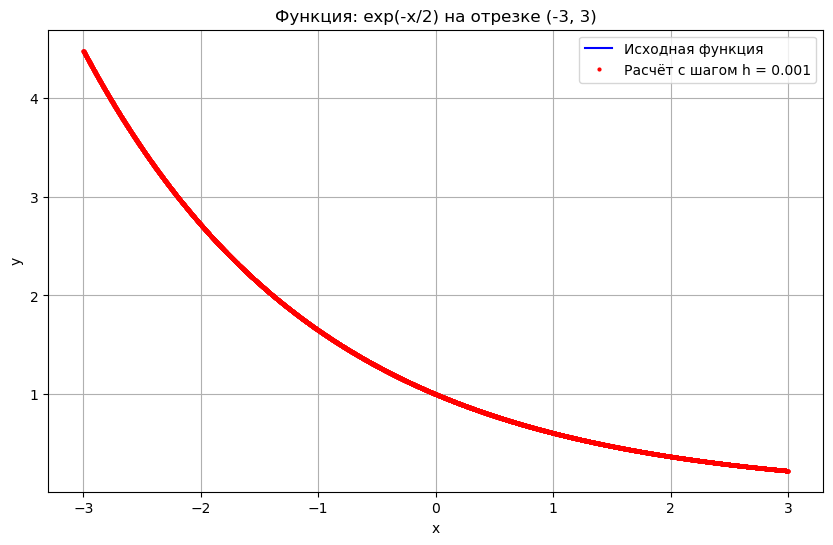

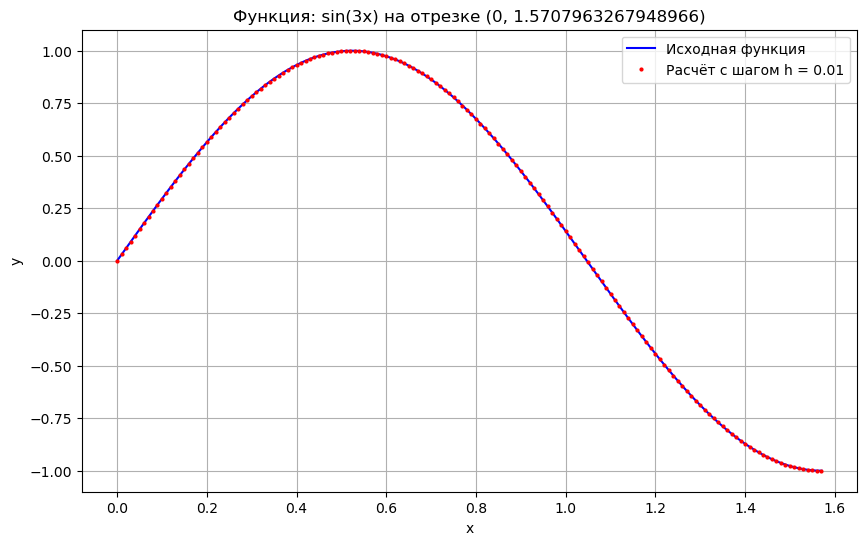

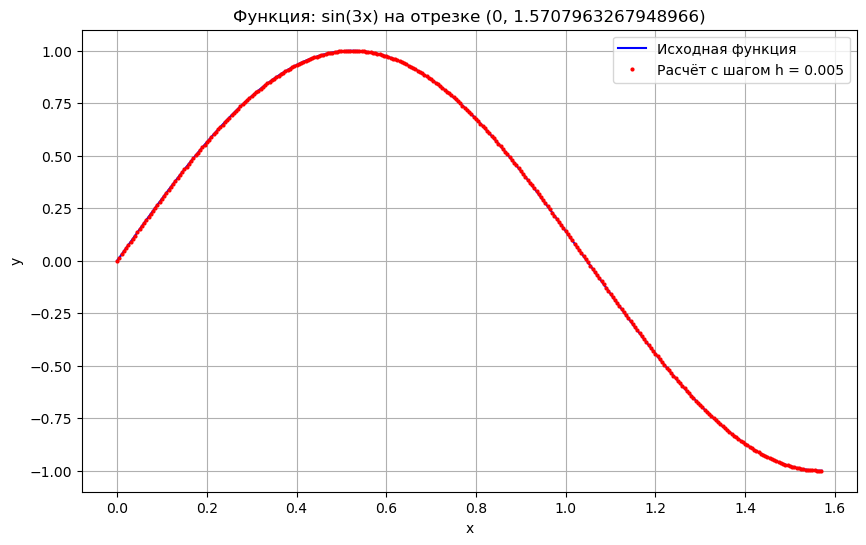

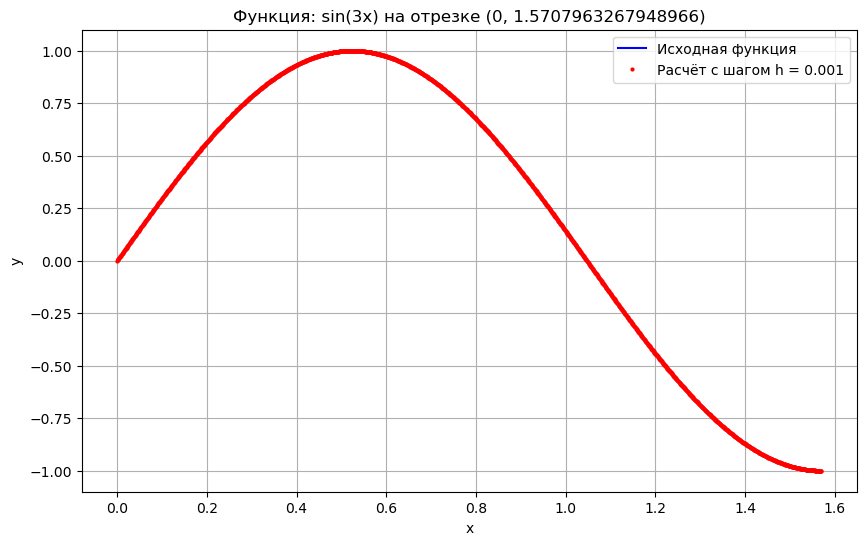

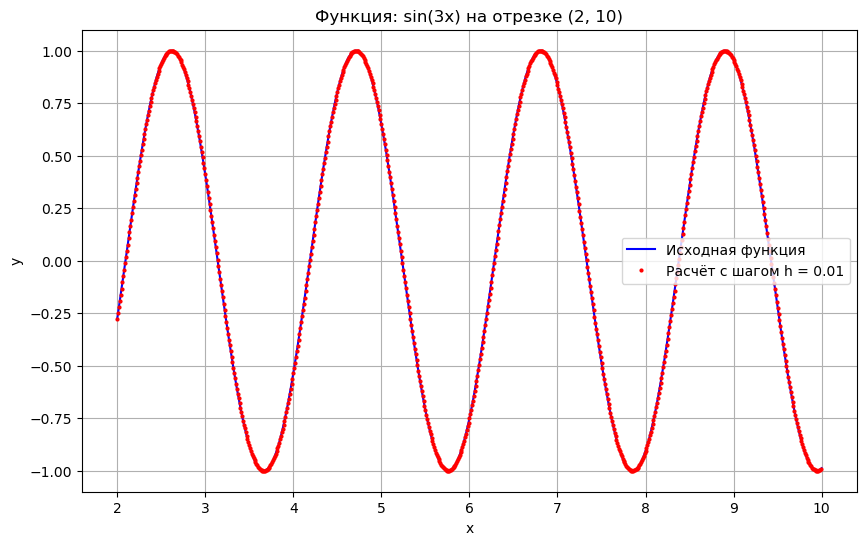

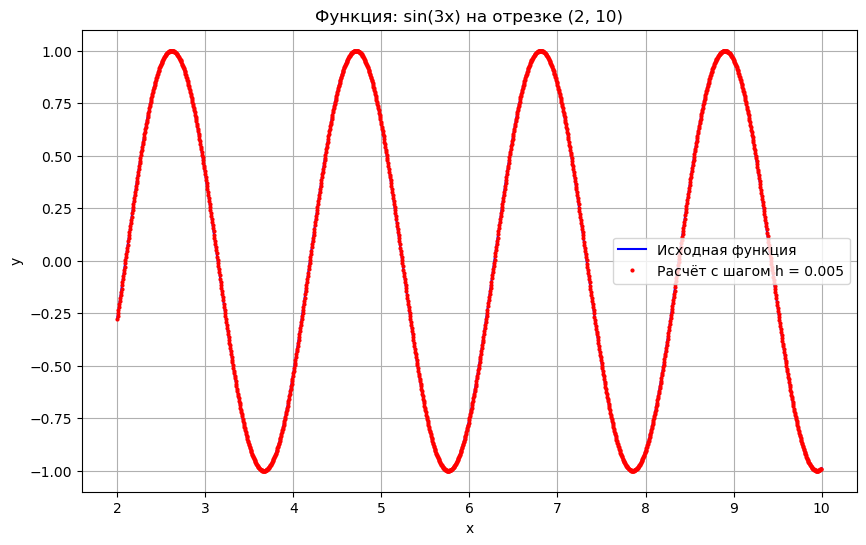

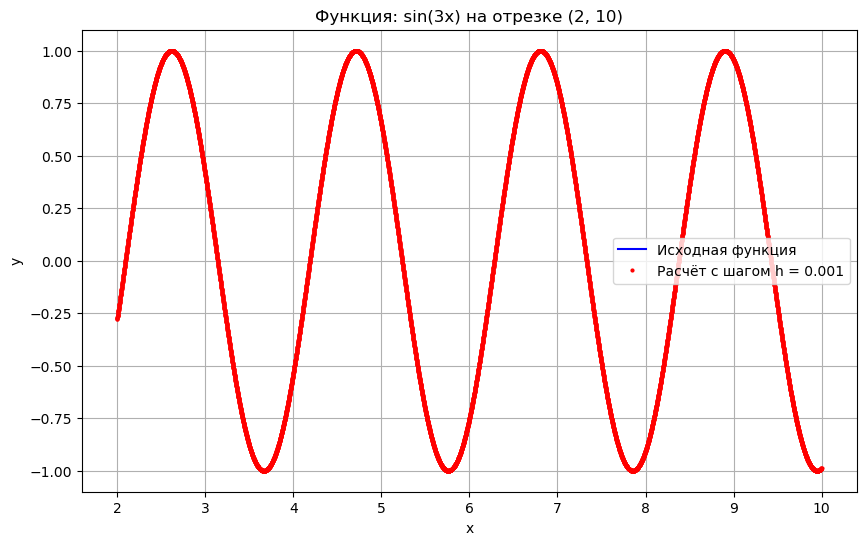

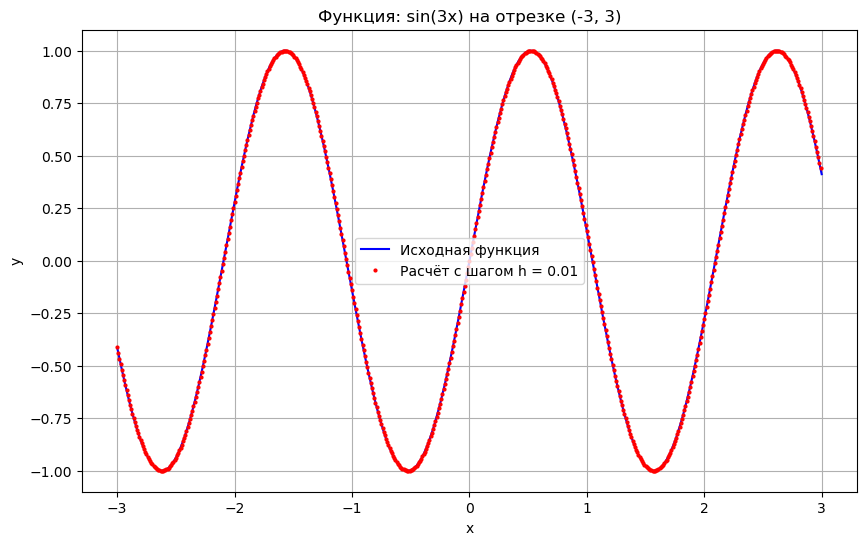

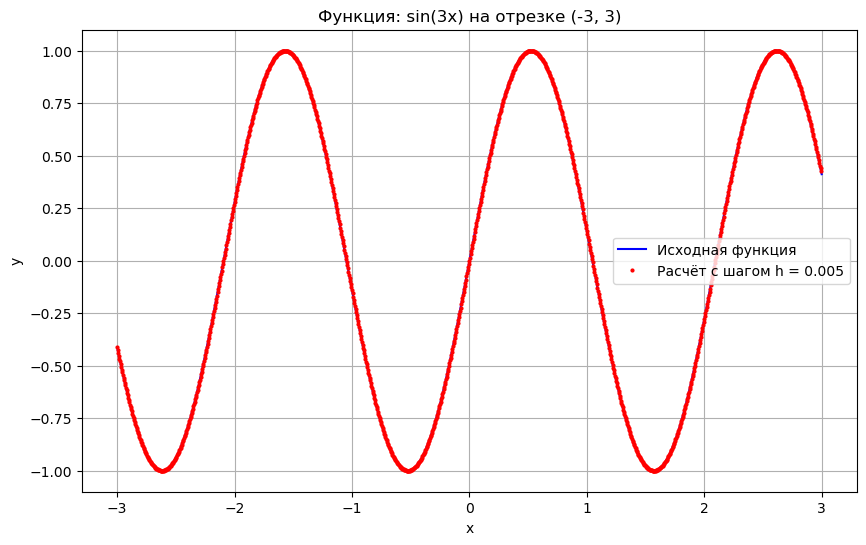

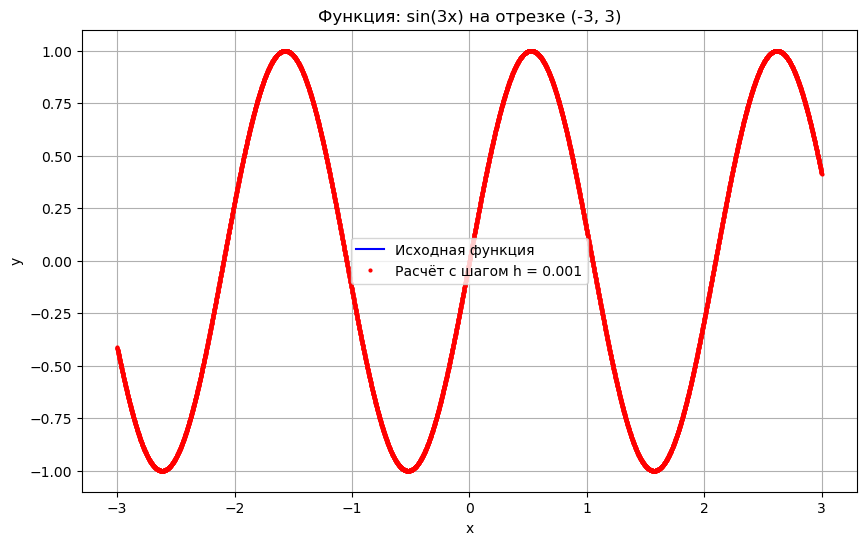

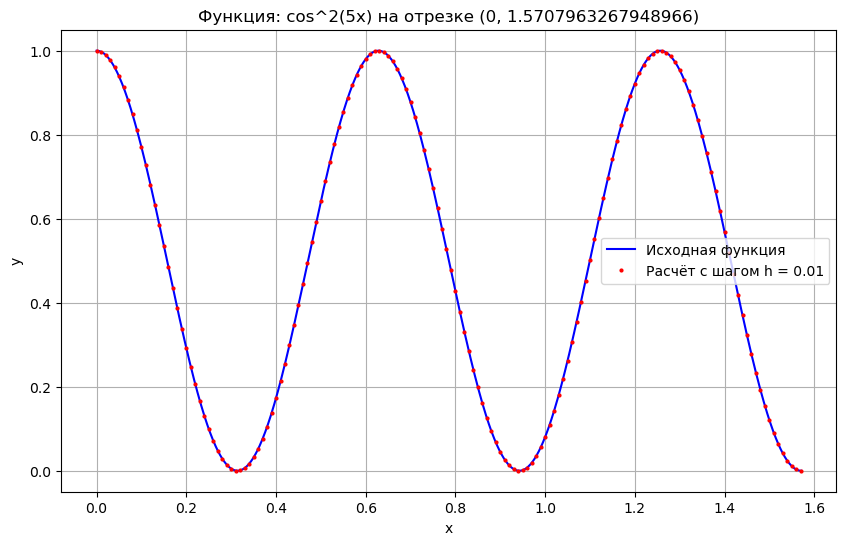

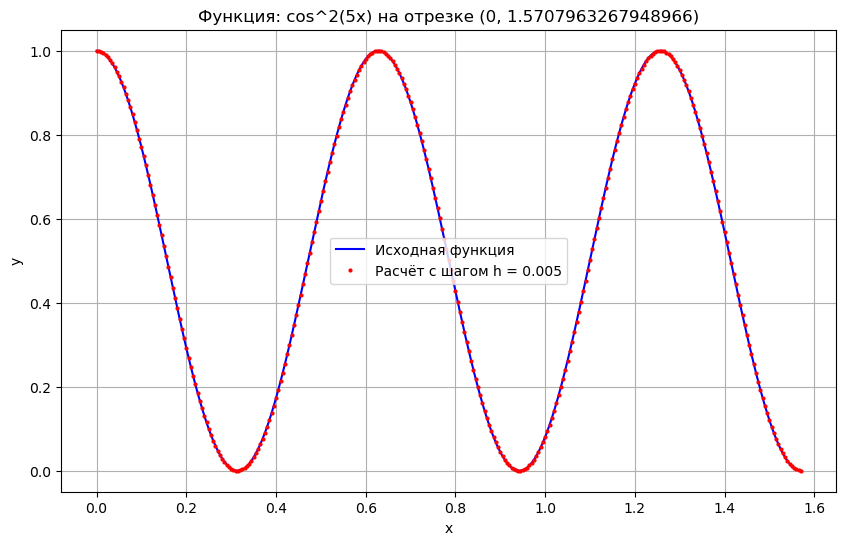

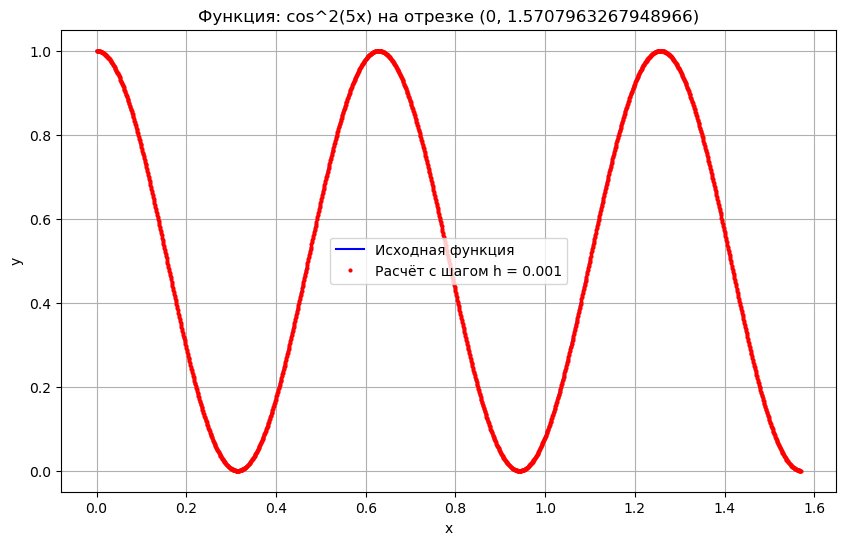

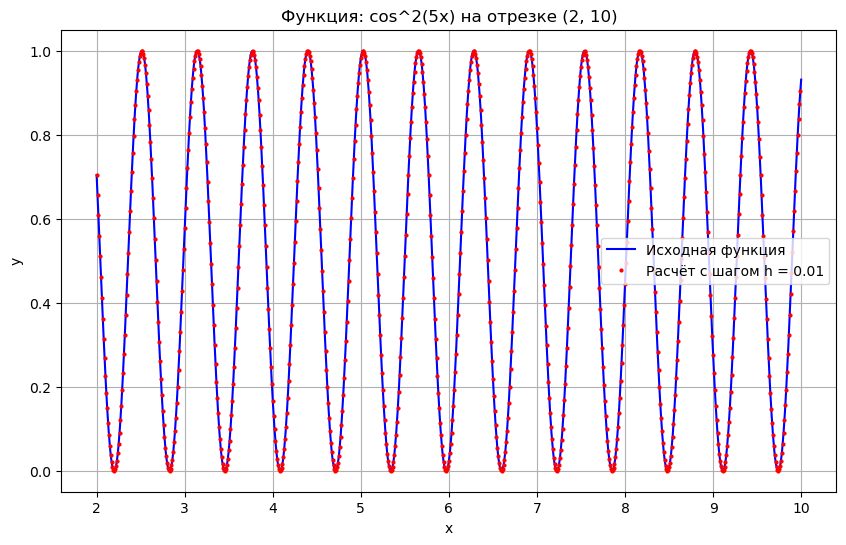

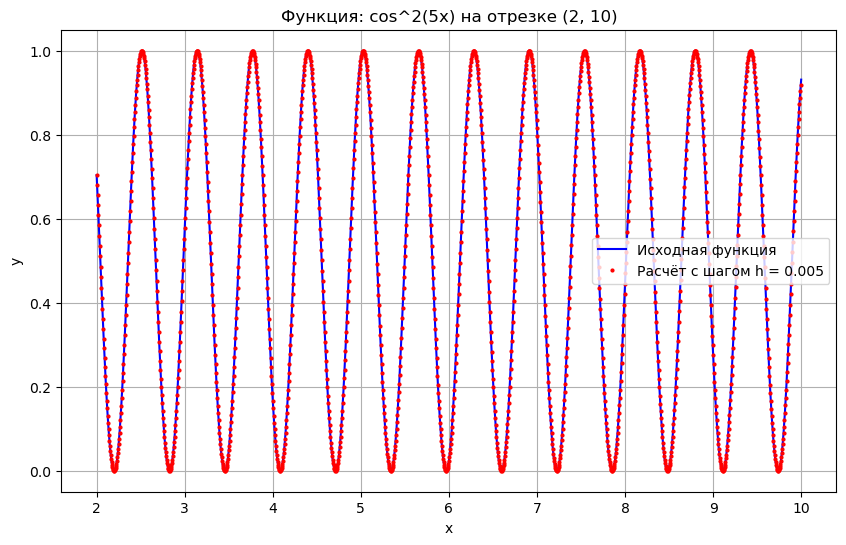

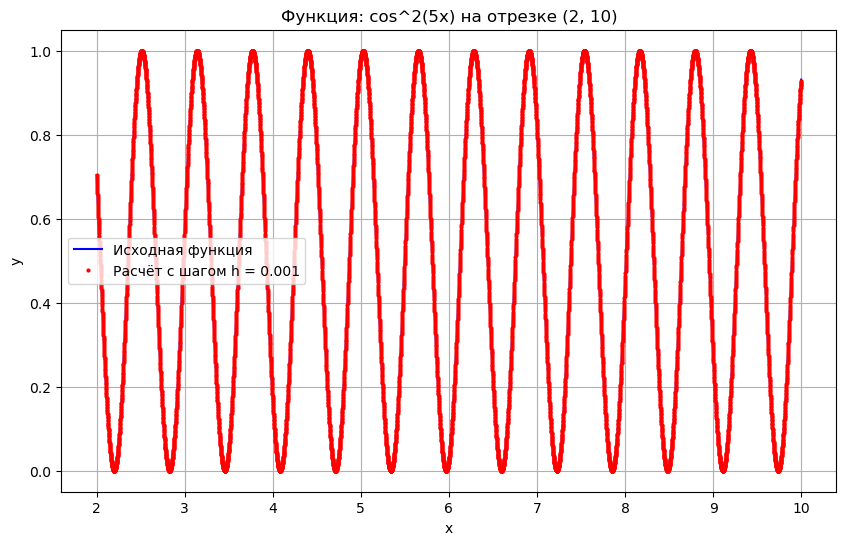

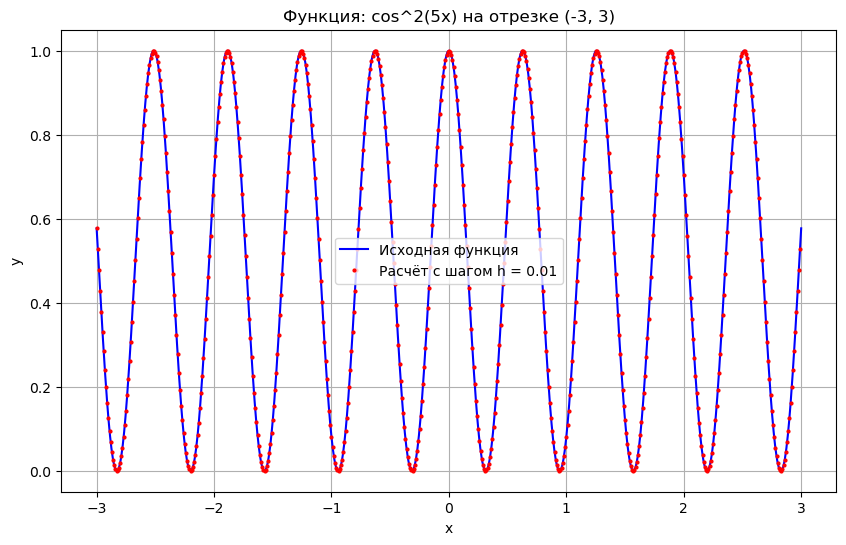

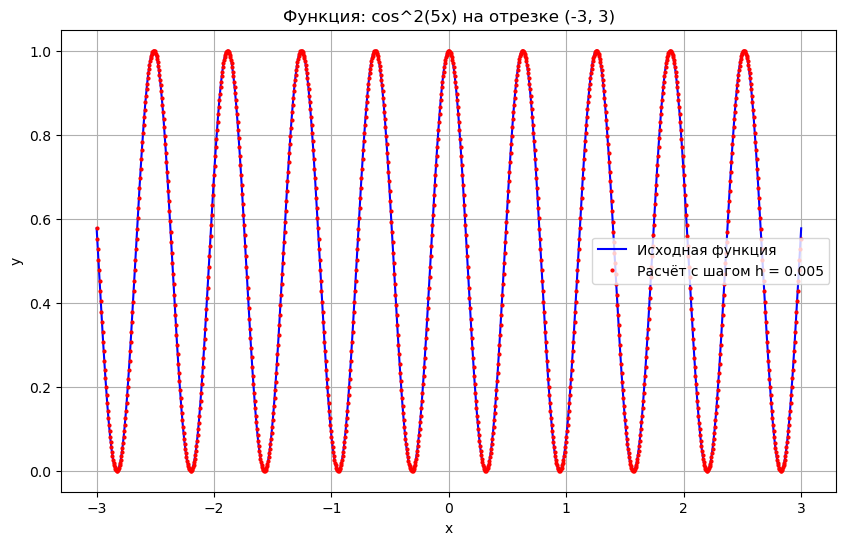

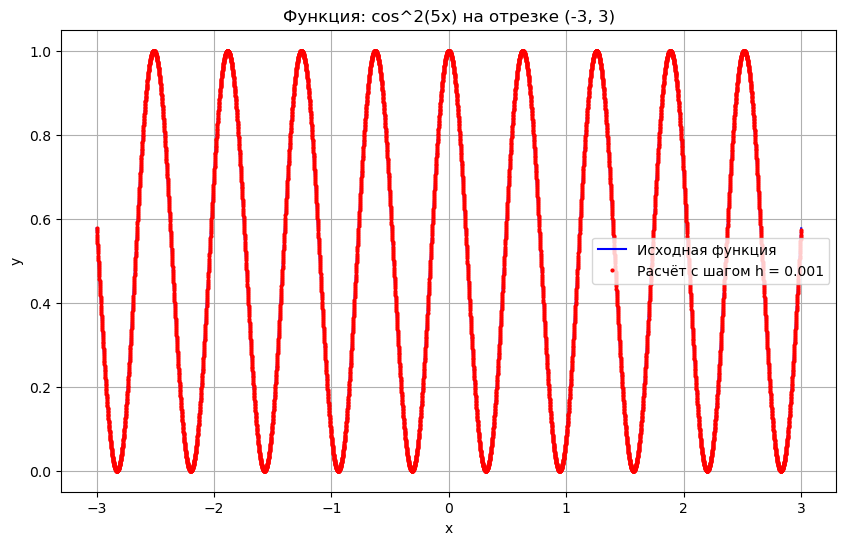

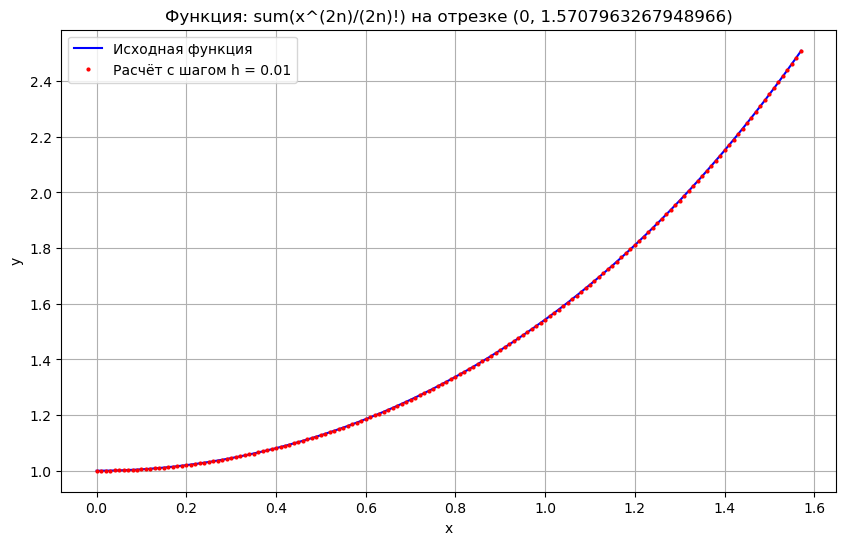

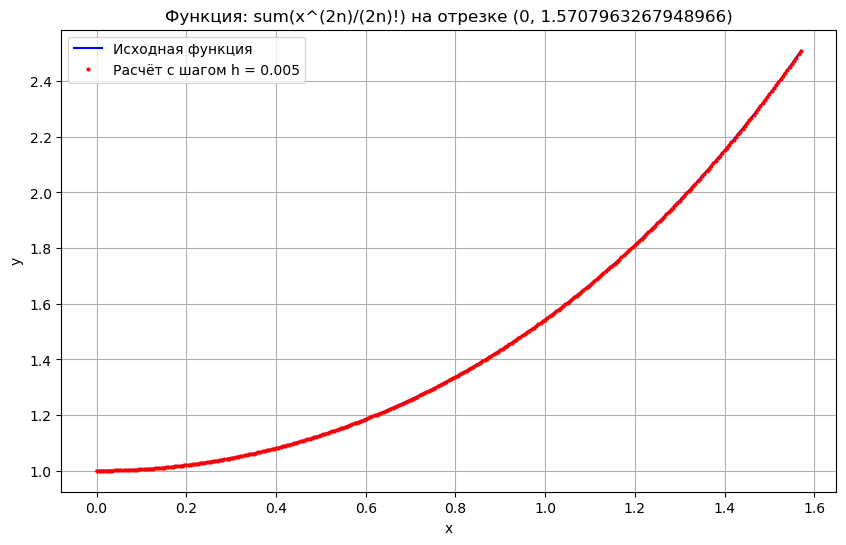

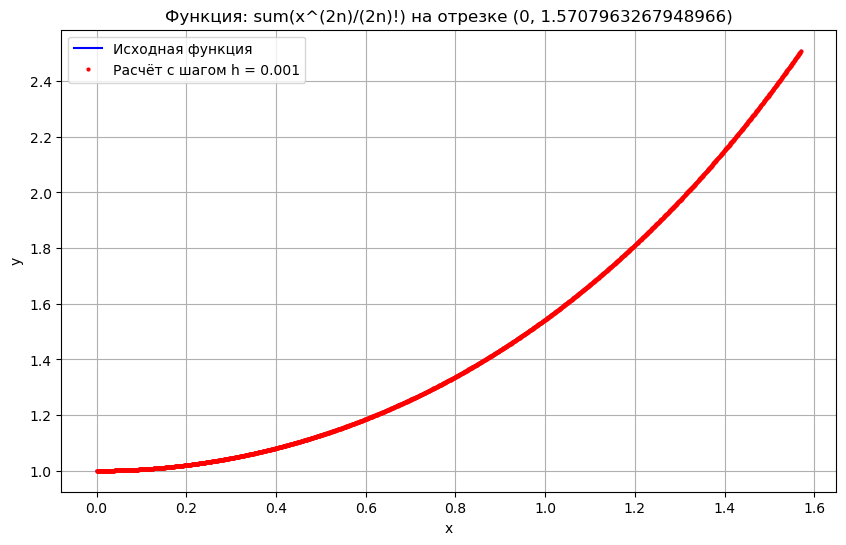

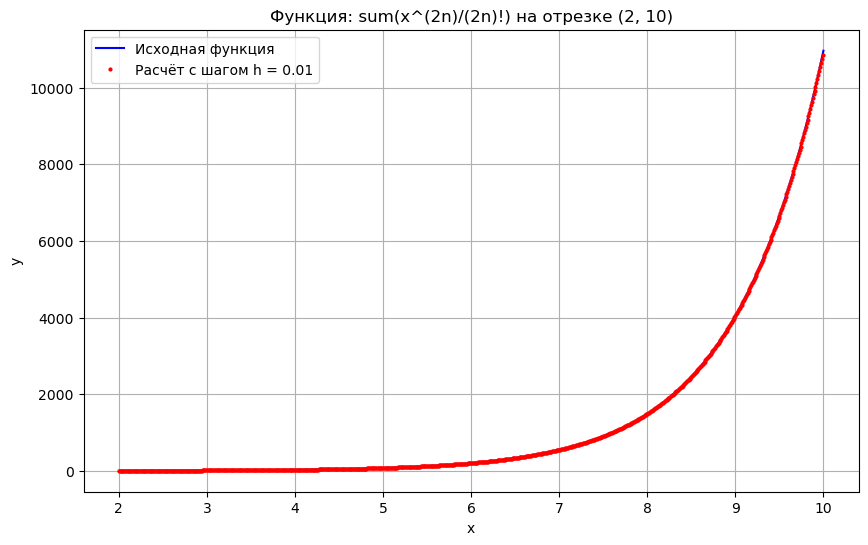

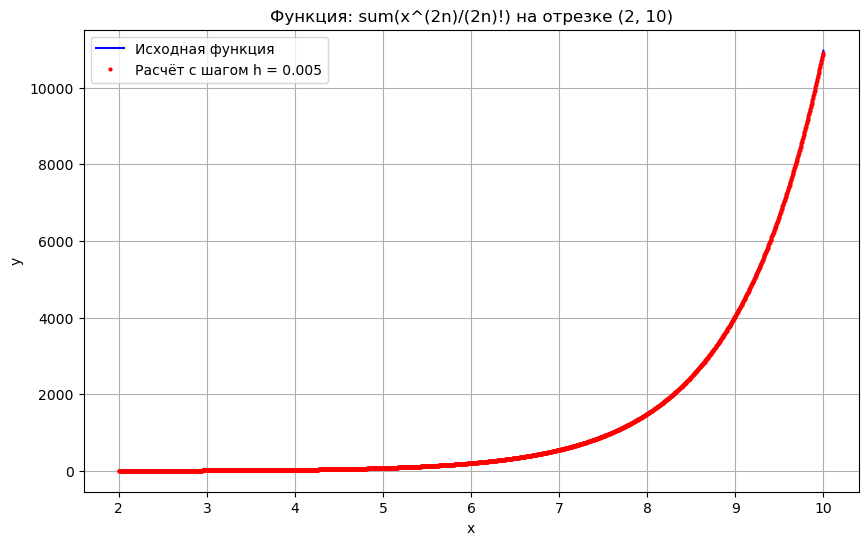

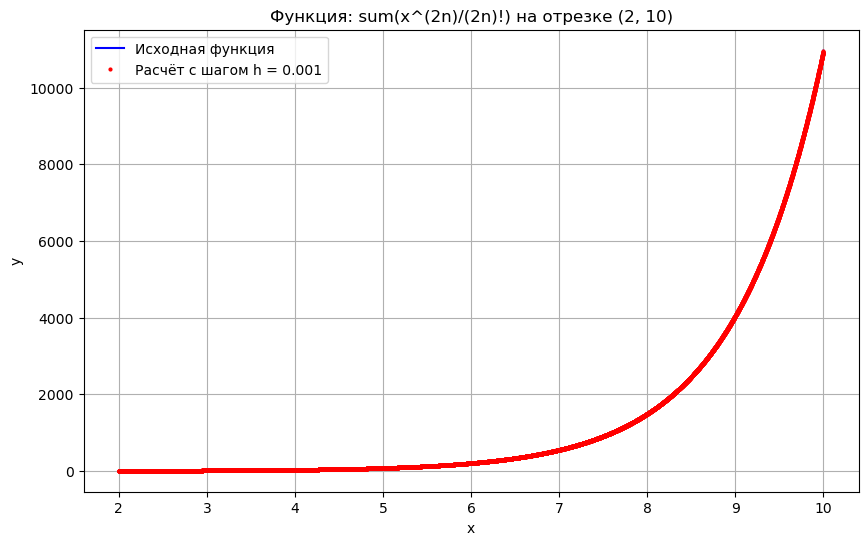

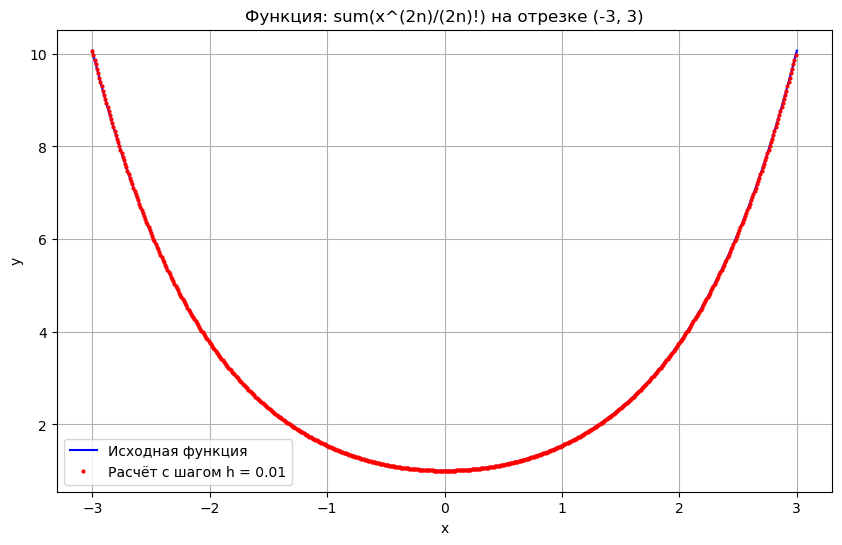

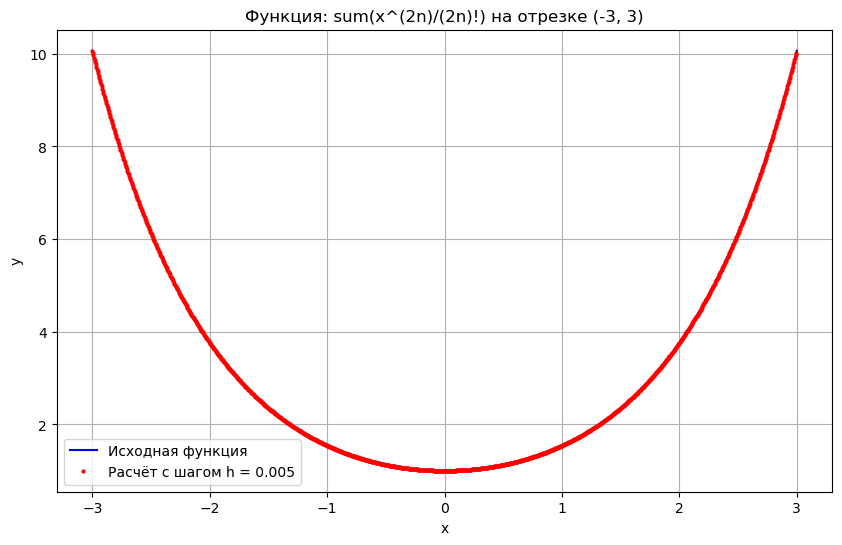

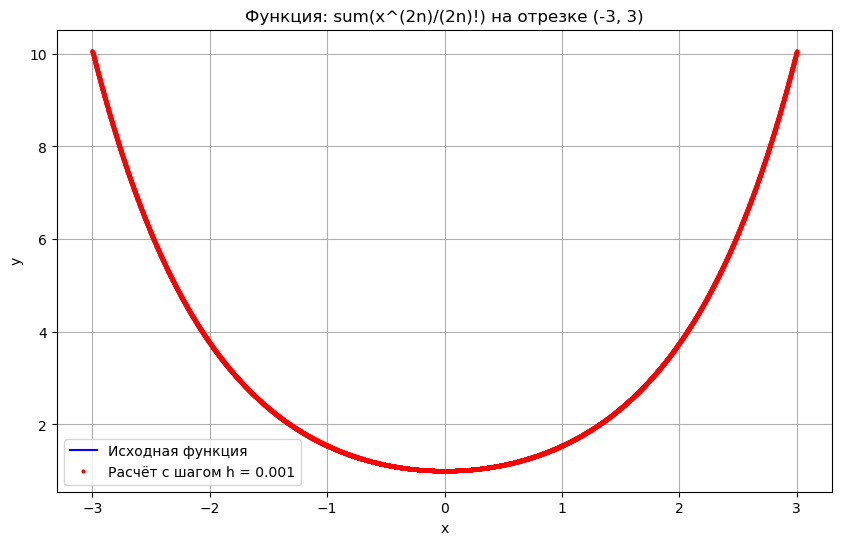

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

def f1(x):
    return np.exp(-x / 2)

def f2(x):
    return np.sin(3 * x)

def f3(x):
    return np.cos(5 * x) ** 2

def f4(x):
    return np.sum([x ** (2 * n) / math.factorial(2 * n) for n in range(10)])

funcs = [f1, f2, f3, f4]
intervals = [(0, np.pi / 2), (2, 10), (-3, 3)]
h = [0.01, 0.005, 0.001]
function_names = ['exp(-x/2)', 'sin(3x)', 'cos^2(5x)', 'sum(x^(2n)/(2n)!)']

for i, func in enumerate(funcs):
    for j, interval in enumerate(intervals):
        for k, step in enumerate(h):
            x1 = np.arange(interval[0], interval[1], step)
            y1 = np.vectorize(func)(x1)
            
            x2 = np.linspace(interval[0], interval[1], 1000)
            y2 = np.vectorize(func)(x2)
            
            plt.figure(figsize=(10, 6))
            plt.plot(x2, y2, label='Исходная функция', color='blue')
            plt.plot(x1, y1, 'o', label=f'Расчёт с шагом h = {step}', markersize=2, color='red')
            plt.title(f'Функция: {function_names[i]} на отрезке {interval}')
            plt.xlabel('x')
            plt.ylabel('y')
            plt.legend()
            plt.grid(True)
            plt.show()
            


2. Для заданных функций найдите численное значение производной
первого порядка по формуле $y' ≈ \frac{y_{n+1} - y_{n}}{h}$
Для этого введите сеточные
функции и для каждой функции и каждого разбиения примените
указанную формулу. Список функций:  
$$e^{\frac{-x^2}{2}}; \sin^3\frac{3x^4}{5}; \cos^2\frac{x}{x + 1}; \ln(x + \sqrt{4+ x^2}); \frac{x \arctan x}{\sqrt{x^2 + 4}}$$
Для каждой функции взять отрезки [0; 1]; [2; 15]; [−5; 5], для каждого
отрезка используйте равномерную сетку с шагом $ℎ = 0.01; 0.005$.
Постройте графики численных производных для каждого из отрезков и
параметра ℎ, а так же графики производных, вычисленных
аналитически.

In [2]:
def f1(x):
    return np.exp(-x**2/2)

def f2(x):
    return np.sin((3 * x**4) / 5)**3

def f3(x):
    return np.cos(x / (x + 1))**2

def f4(x):
    return np.log(x + np.sqrt(4 + x**2))

def f5(x):
    return (x * np.arctan(2 * x)) / (x ** 2 + 4)

def num_derivative(y, h):
    return (y[1:] -y[:-1]) /h


Аналитические производные:  

In [3]:
def f1_derivative(x):
    return -x * np.exp((-x**2) / 2)

def f2_derivative(x):
    return 12 * x**3 * np.sin((3 * x**4) / 5)**2 * np.cos((3 * x**4) / 5) / 5

def f3_derivative(x):
    return -2 * np.cos(x / (x + 1)) * np.sin(x / (x + 1)) * (1 / (x + 1)**2)

def f4_derivative(x):
    return (1 + x / np.sqrt(4 + x**2)) / (x + np.sqrt(4 + x**2))

def f5_derivative(x):
    numerator = np.arctan(2 * x) + (2 * x) / (1 + (2 * x) ** 2)
    denominator = x ** 2 + 4
    return (numerator * denominator - x * np.arctan(2 * x) * 2 * x) / (denominator ** 2)

derivatives = [f1_derivative, f2_derivative, f3_derivative, f4_derivative, f5_derivative]

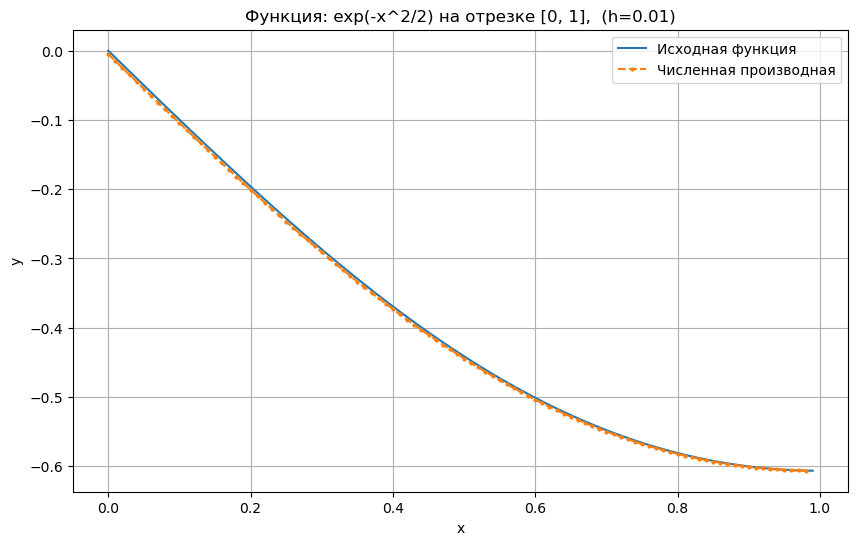

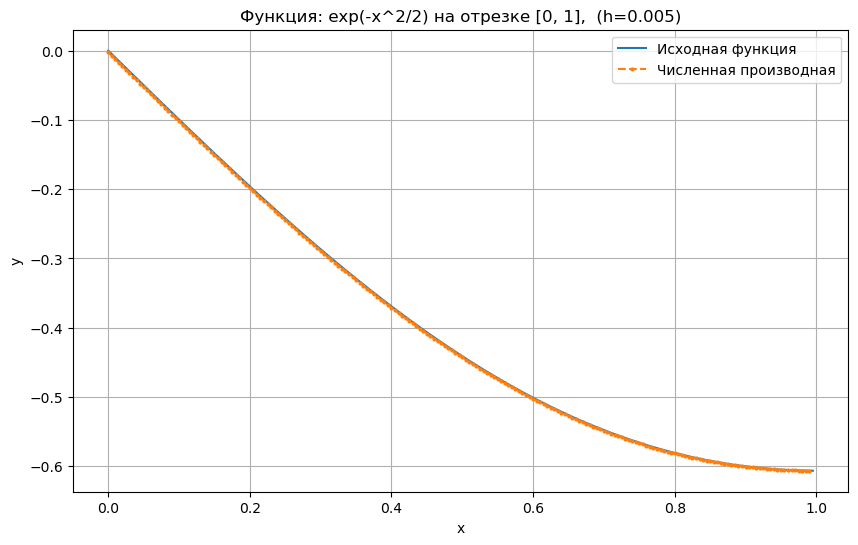

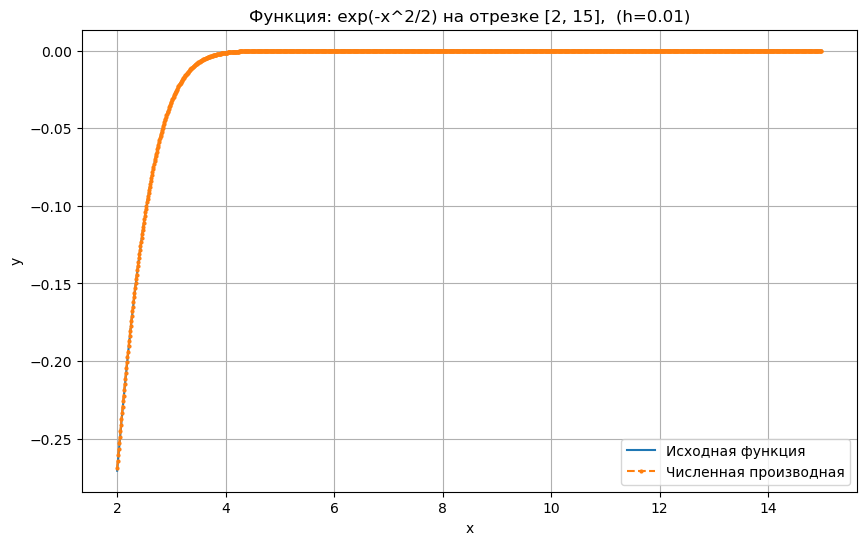

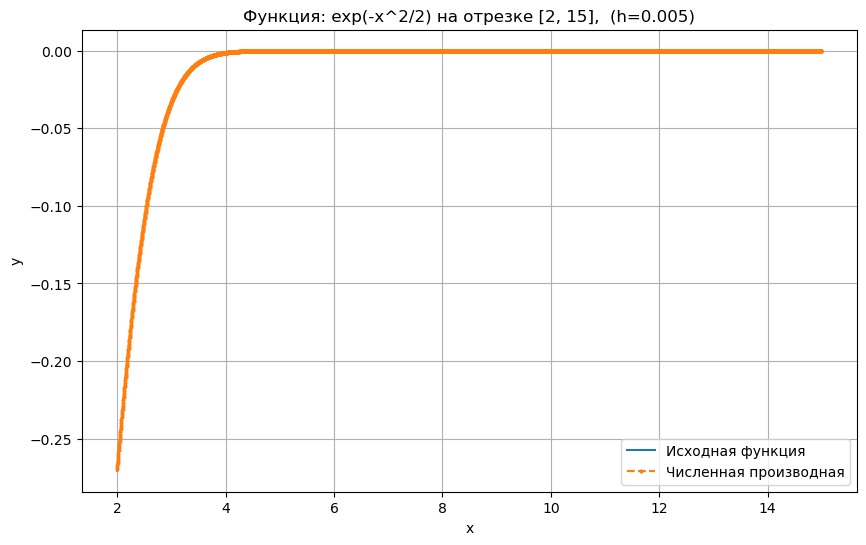

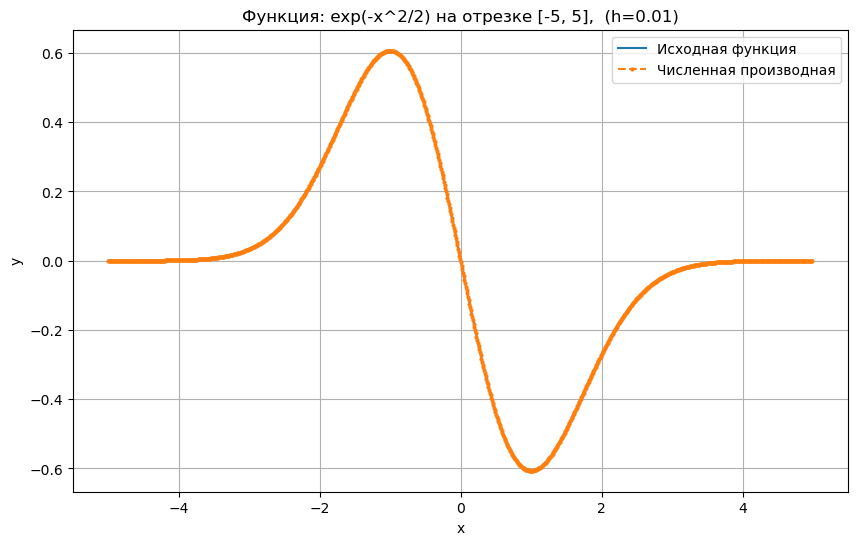

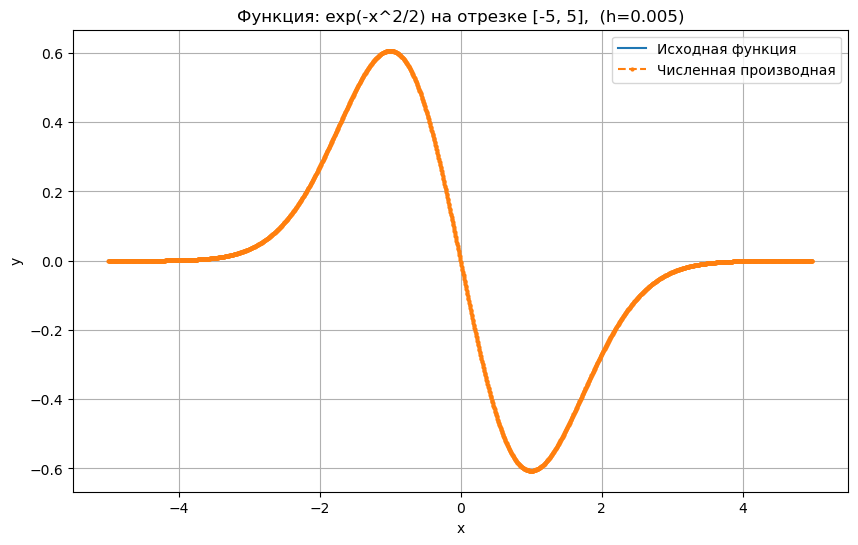

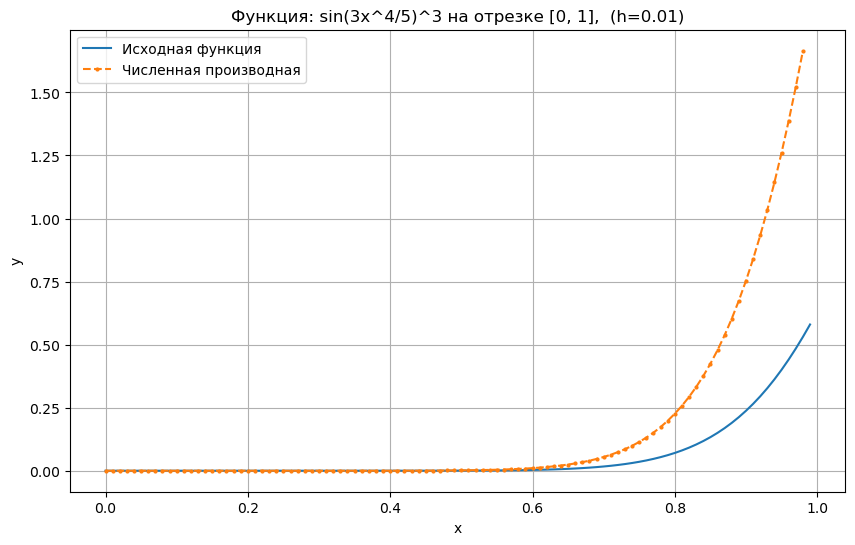

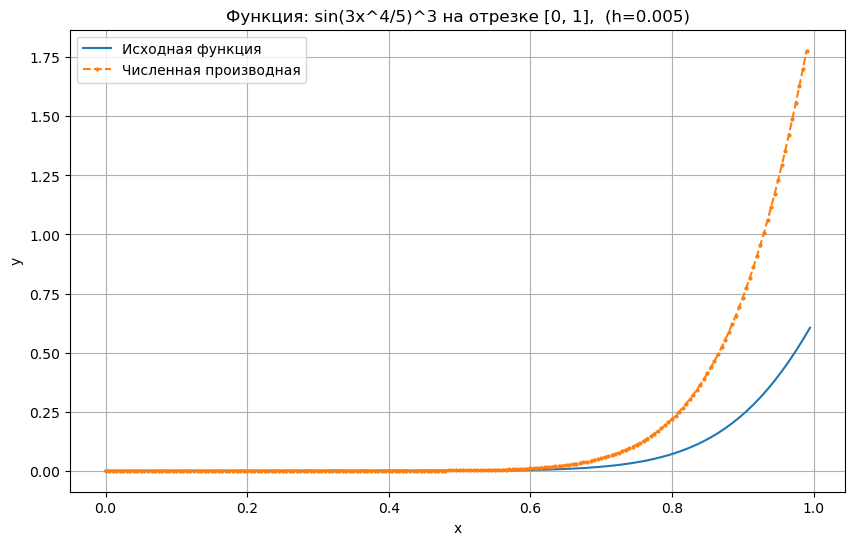

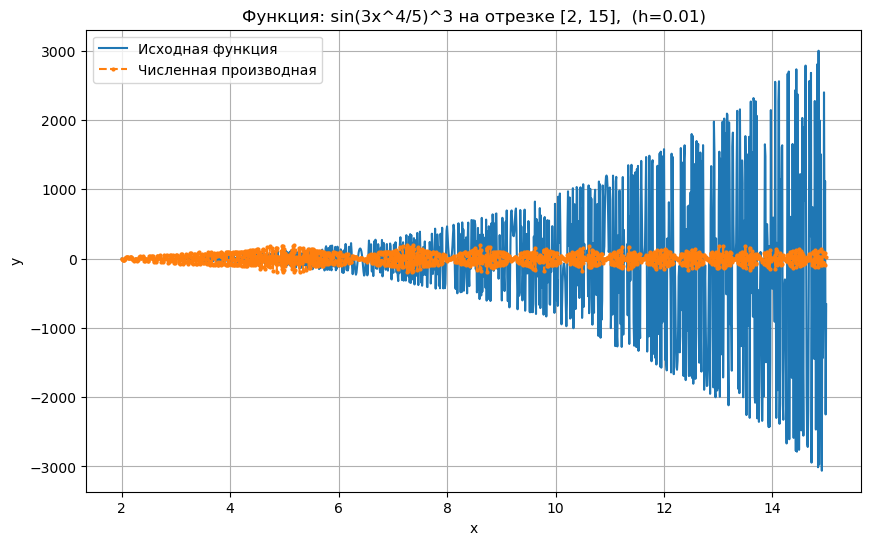

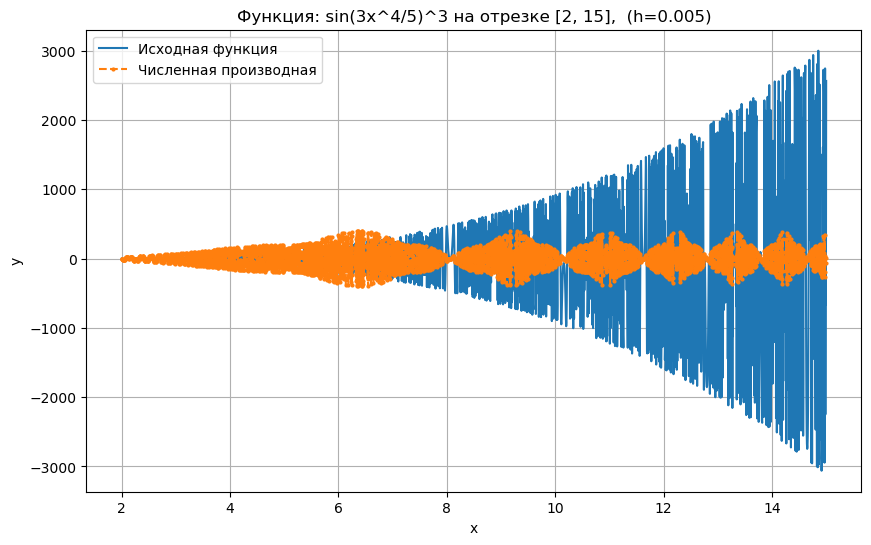

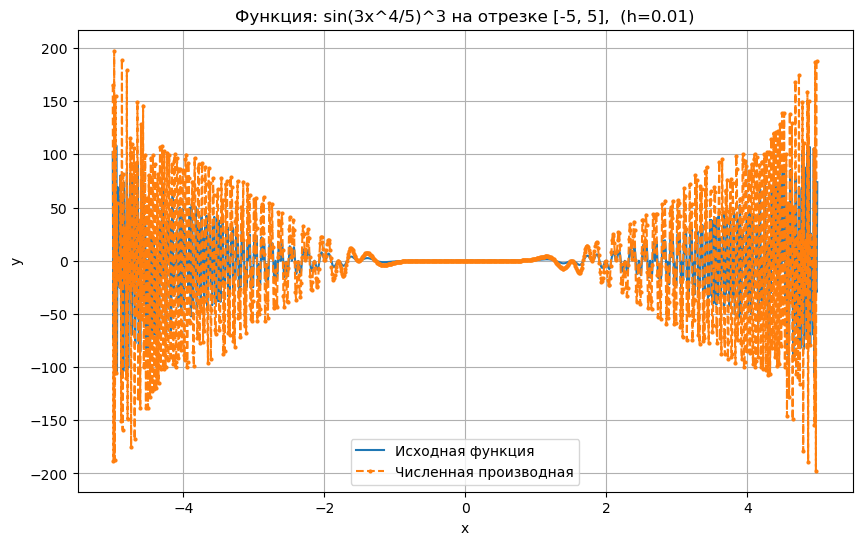

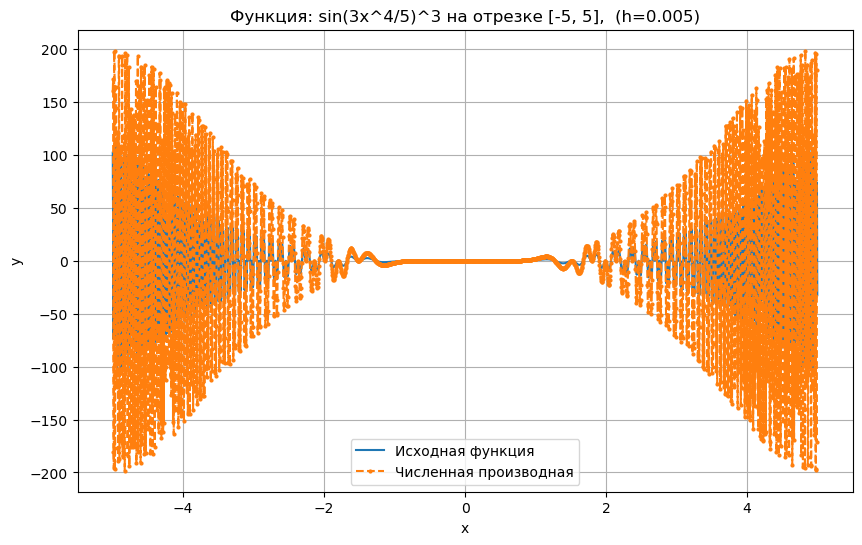

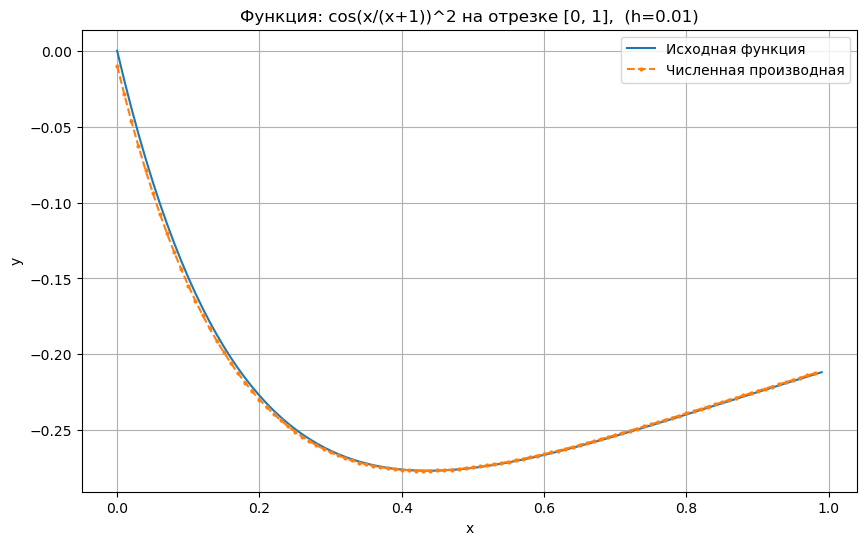

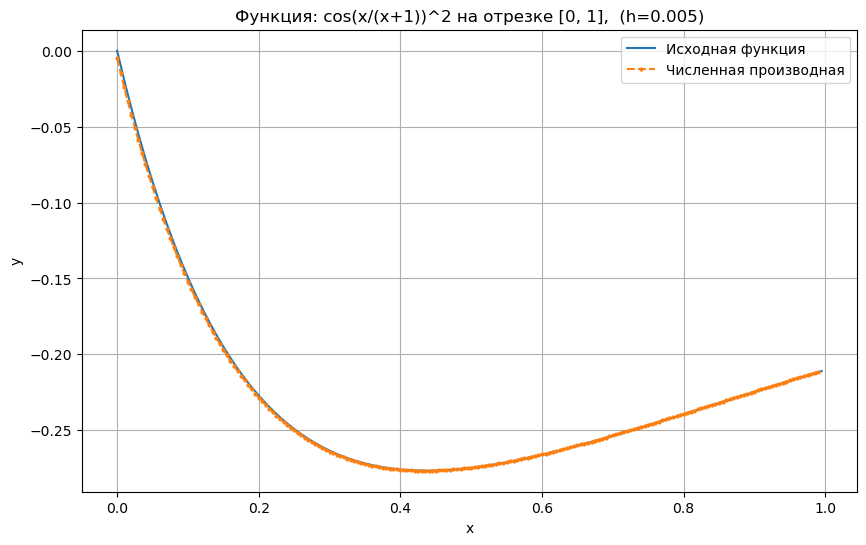

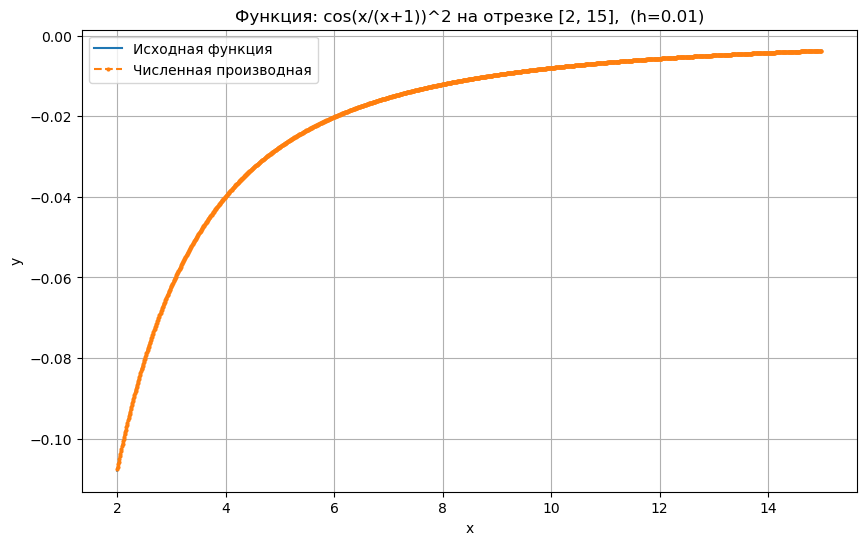

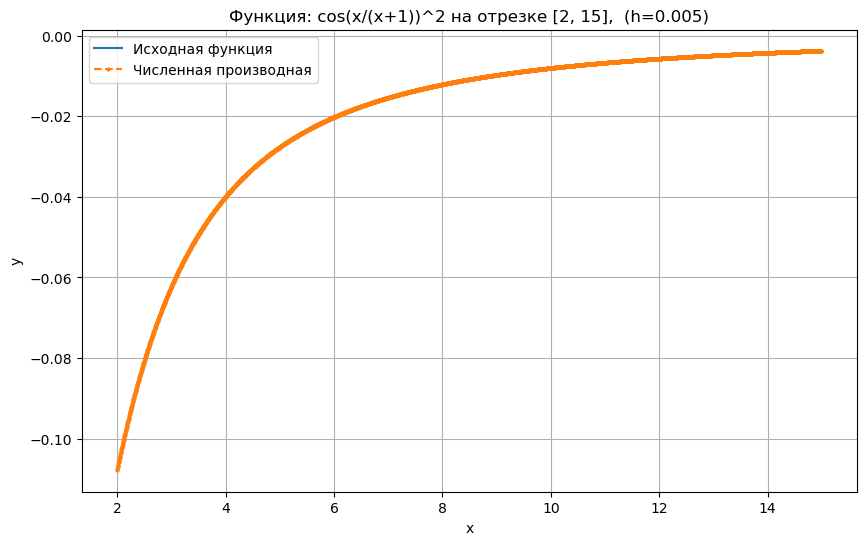

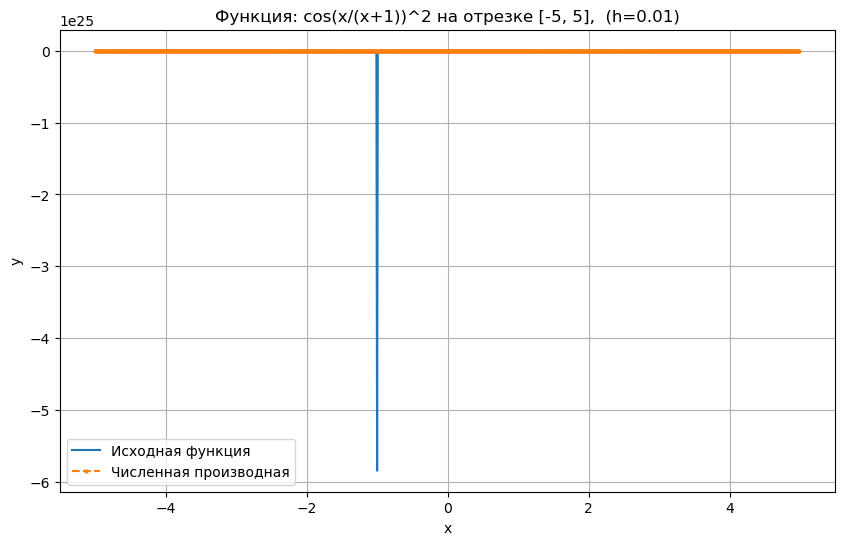

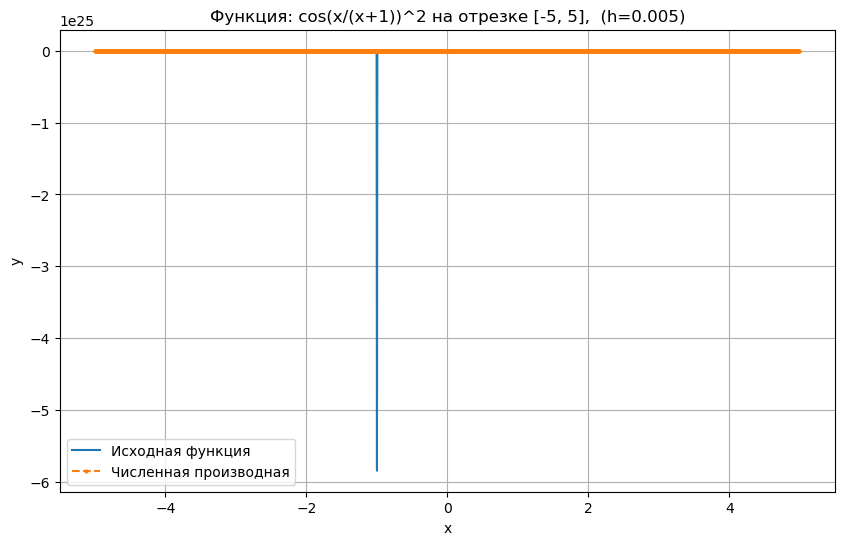

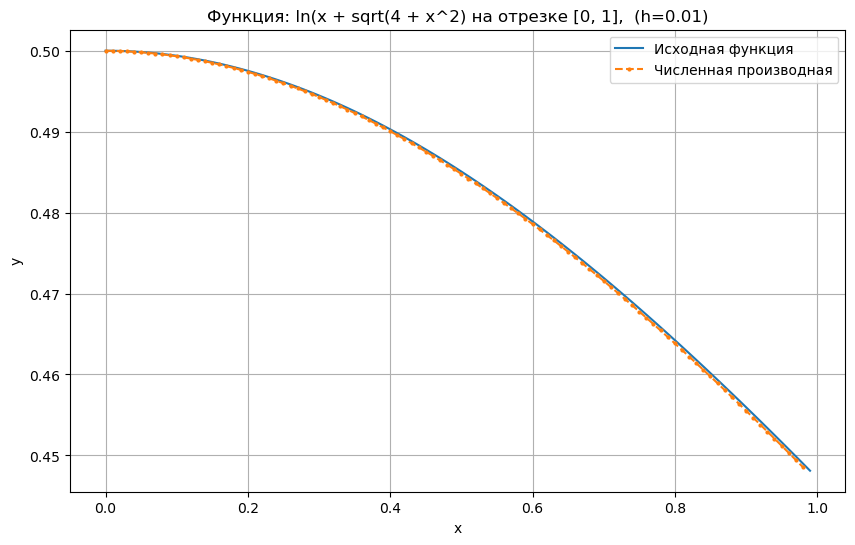

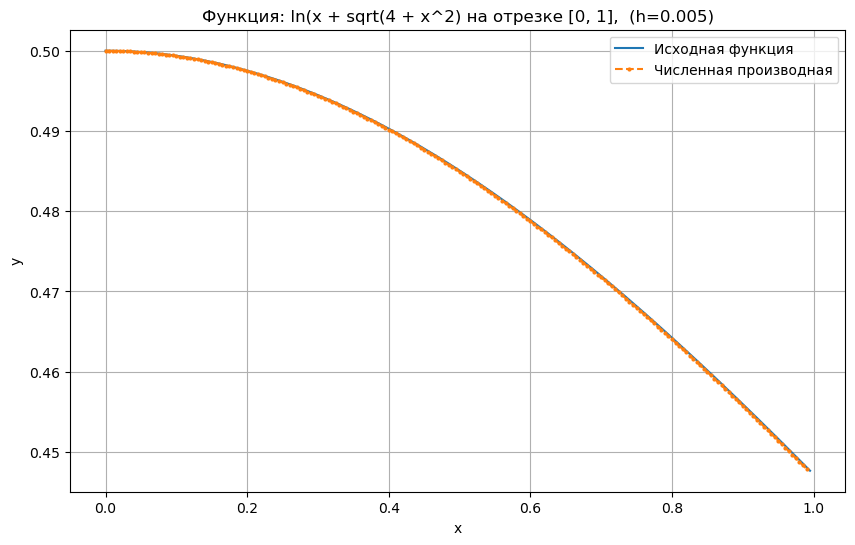

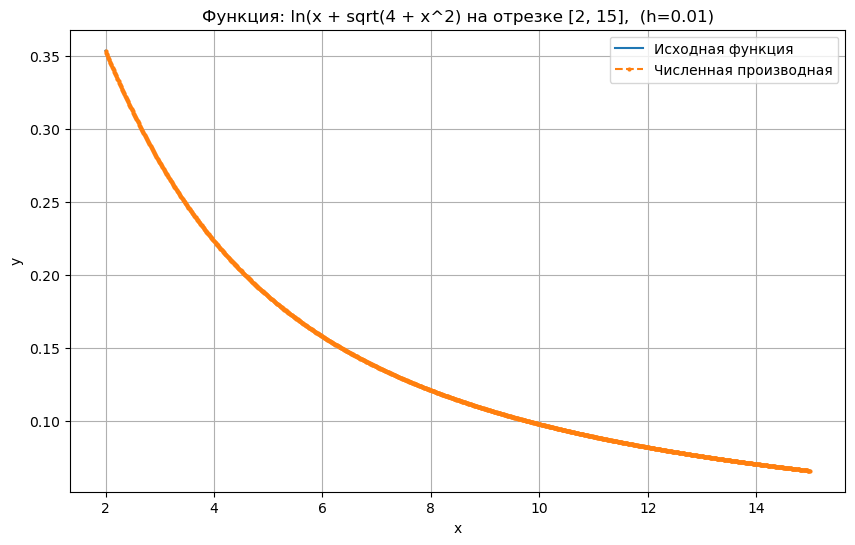

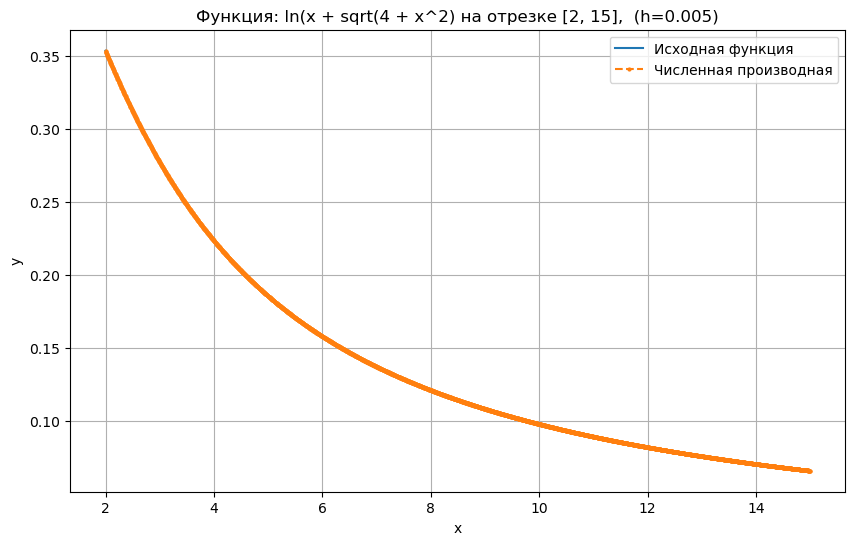

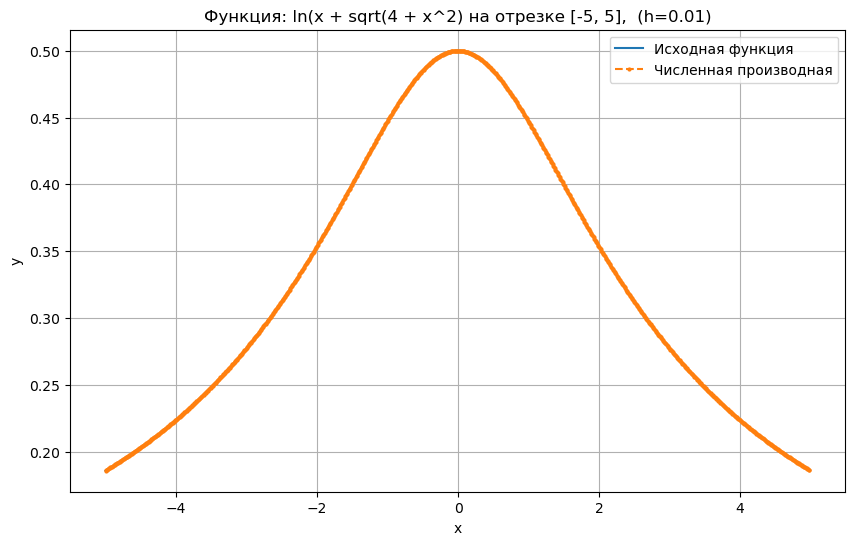

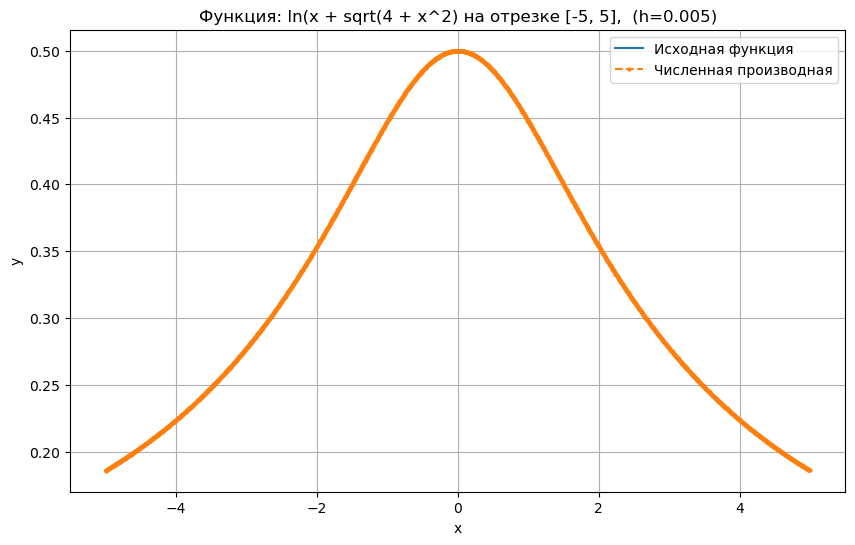

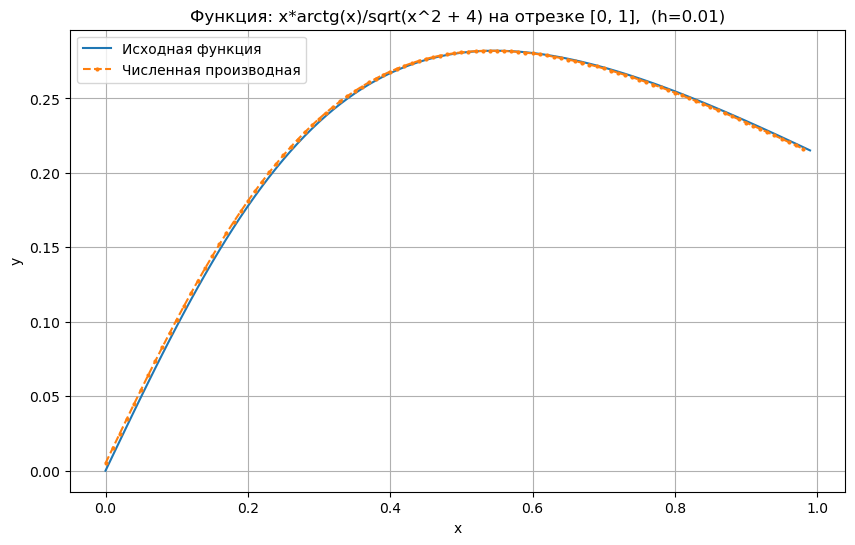

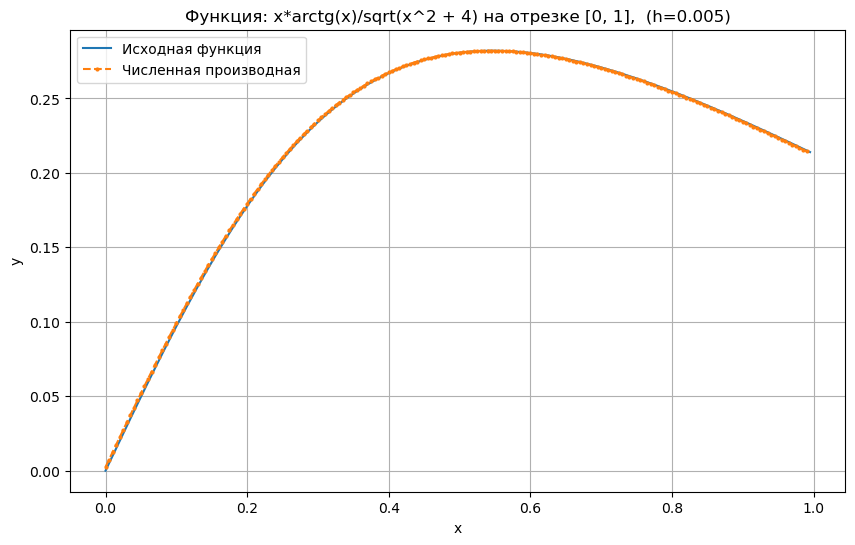

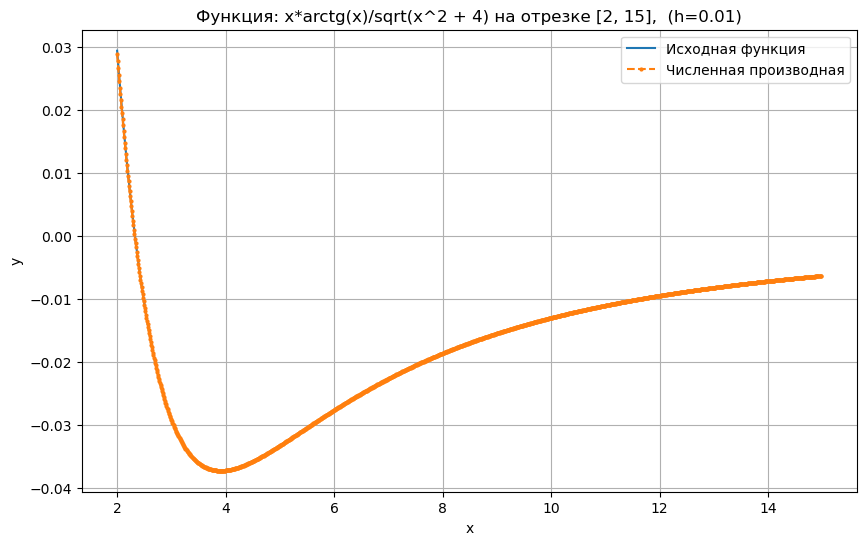

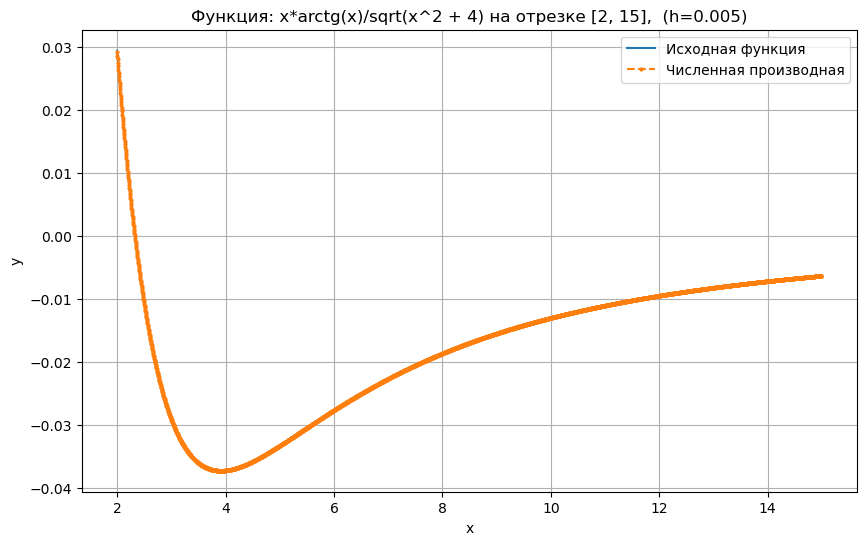

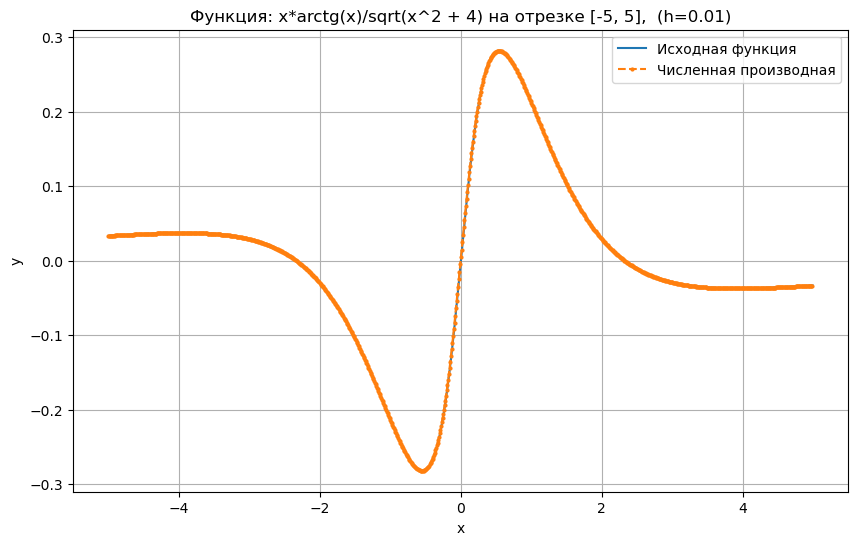

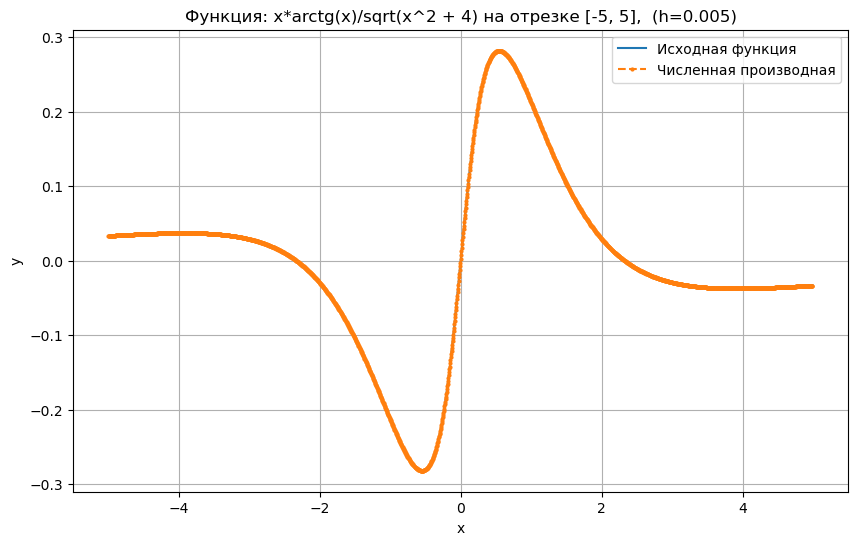

In [4]:
funcs = [f1, f2, f3, f4, f5]
intervals = [[0, 1], [2, 15], [-5, 5]]
steps = [0.01, 0.005]
function_names = ['exp(-x^2/2)', 'sin(3x^4/5)^3', 'cos(x/(x+1))^2', 'ln(x + sqrt(4 + x^2)', 'x*arctg(x)/sqrt(x^2 + 4)']

for i, func in enumerate(funcs):
    for interval in intervals:
        for h in steps:
            x1 = np.arange(interval[0], interval[1], h)
            y1 = func(x1)
            
            num_deriv = num_derivative(y1, h)
            deriv_func = np.vectorize(derivatives[i])(x1)
            
            plt.figure(figsize=(10, 6))
            plt.plot(x1, deriv_func, label=f"Исходная функция", linestyle='-')
            plt.plot(x1[:-1], num_deriv, 'o', label=f"Численная производная", markersize=2, linestyle='--')
            plt.title(f"Функция: {function_names[i]} на отрезке {interval},  (h={h})")
            plt.xlabel('x')
            plt.ylabel('y')
            plt.legend()
            plt.grid(True)
            plt.show()
            

3 .Для заданных задач Коши с использованием метода Эйлера найдите
приближенные численные решения.  
a) $y' = \frac{1}{2}y, y(0) = 1$;  
b) $y' = 2x + 3y, y(0) = -2$;  
c) $\begin{cases} x_1' = x_2 \\ x_2' = -x_1 \end{cases},\; x_1(0) = 1, x_2(0) = 0$;  
d) $\begin{cases} x_1' = x_2 \\ x_2' = 4x_1 \end{cases},\; x_1(0) = 1, x_2(0) = 1$;  
Постройте графики приближенных решений на отрезке $[0; 10]$ с шагом
$ℎ = 0.025$.

Метод Эйлера заключается в том, что приближенное значение функции в точке $y_{n+1}$ находится из приближенного значения функции в точке $y_n$ по формуле:
$$y_{n+1} = y_n + h \cdot f(x_n, y_n)$$
где $f(x, y)$ - правая часть дифференциального уравнения, $h$ - шаг сетки.

Для системы дифференциальных уравнений первого порядка метод Эйлера будет выглядеть следующим образом:
$$\begin{cases} y_1' = f_1(x, y_1, y_2, ..., y_n) \\ y_2' = f_2(x, y_1, y_2, ..., y_n) \\ ... \\ y_n' = f_n(x, y_1, y_2, ..., y_n) \end{cases}$$

Приближенное значение функции в точке $y_{n+1}$ находится по формуле:
$$\begin{cases} y_{1, n+1} = y_{1, n} + h \cdot f_1(x_n, y_{1, n}, y_{2, n}, ..., y_{n, n}) \\ y_{2, n+1} = y_{2, n} + h \cdot f_2(x_n, y_{1, n}, y_{2, n}, ..., y_{n, n}) \\ ... \\ y_{n, n+1} = y_{n, n} + h \cdot f_n(x_n, y_{1, n}, y_{2, n}, ..., y_{n, n}) \end{cases}$$

где $f_i(x, y_1, y_2, ..., y_n)$ - правые части дифференциальных уравнений, $h$ - шаг сетки.

Для заданных задач Коши с использованием метода Эйлера найдем приближенные численные решения.

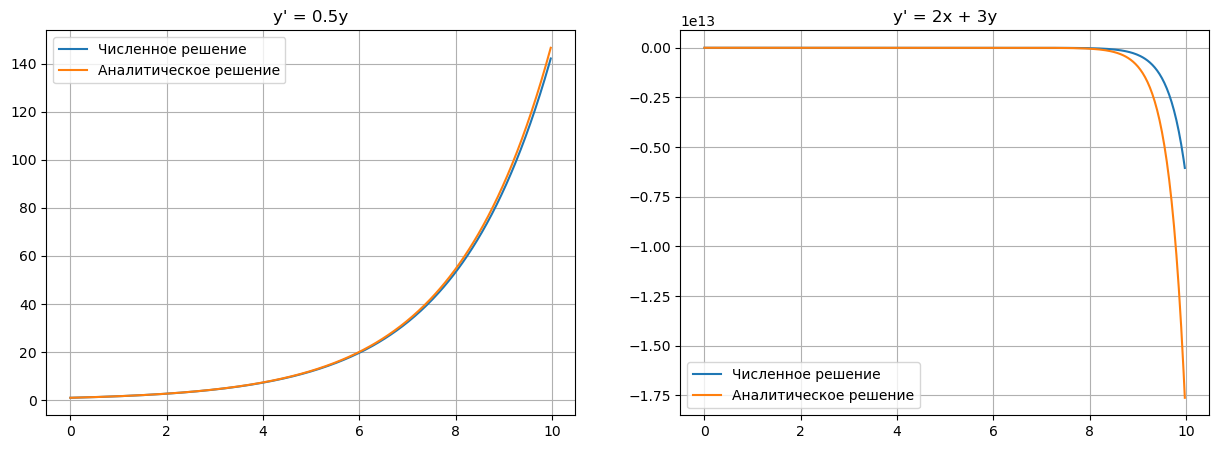

In [5]:
def euler(func, x, y0, h):
    y = np.zeros(len(x))
    y[0] = y0
    for i in range(1, len(x)):
        y[i] = y[i - 1] + h * func(x[i - 1], y[i - 1])
    return x, y

def f1(x, y):
    return 0.5*y

def f2(x, y):
    return 2*x + 3*y

x = np.arange(0, 10, 0.025)
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].plot(*euler(f1, x, 1, 0.025), label='Численное решение')
ax[0].plot(x, np.exp(0.5*x), label='Аналитическое решение')
ax[0].set_title('y\' = 0.5y')
ax[0].legend()
ax[0].grid(True)

ax[1].plot(*euler(f2, x, -2, 0.025), label='Численное решение')
ax[1].plot(x, -2/3*x - 2/9 - 16/9*np.exp(3*x), label='Аналитическое решение')
ax[1].set_title('y\' = 2x + 3y')
ax[1].legend()
ax[1].grid(True)
plt.show()


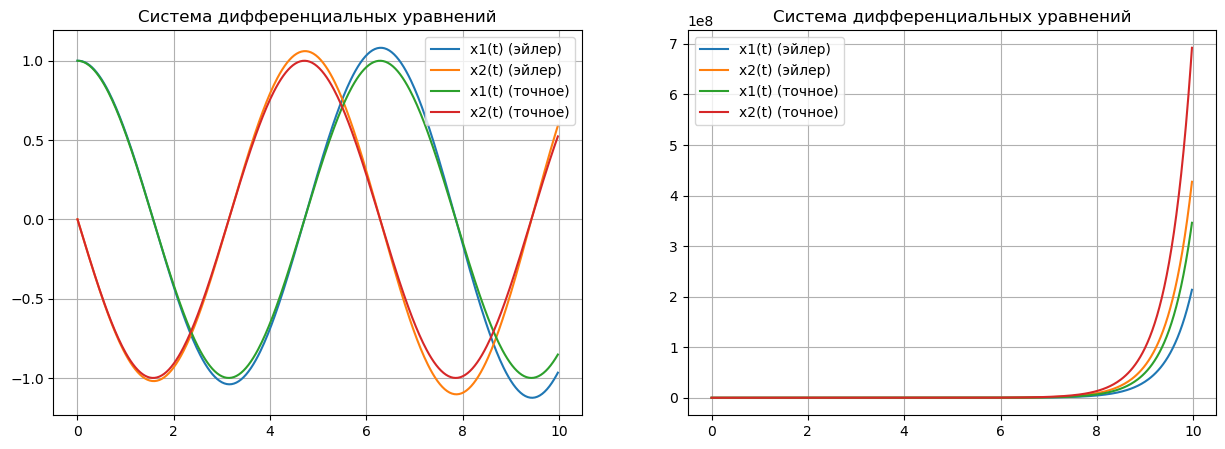

In [8]:
def euler_system(f, y0, x, h):
    y = np.zeros((len(x), len(y0)))
    y[0, :] = y0
    for i in range(1, len(x)):
        y[i, :] = y[i - 1, :] + h * f(x[i - 1], y[i - 1, :])
    return y
    
    
def f3(x, y):
    x1, x2 = y
    return np.array([x2, -x1])

def f4(x, y):
    x1, x2 = y
    return np.array([x2, 4 * x1])

fig, ax = plt.subplots(1, 2, figsize=(15, 5))
x = np.arange(0, 10, 0.025)
y = euler_system(f3, [1, 0], x, 0.025)
ax[0].plot(x, y[:, 0], label='x1(t) (эйлер)')
ax[0].plot(x, y[:, 1], label='x2(t) (эйлер)')
ax[0].plot(x, np.cos(x), label='x1(t) (точное)')
ax[0].plot(x, -np.sin(x), label='x2(t) (точное)')
ax[0].set_title('Система дифференциальных уравнений')
ax[0].legend()
ax[0].grid(True)

y = euler_system(f4, [1, 1], x, 0.025)
ax[1].plot(x, y[:, 0], label='x1(t) (эйлер)')
ax[1].plot(x, y[:, 1], label='x2(t) (эйлер)')
ax[1].plot(x, 3/4 * np.exp(2 * x) + 1/4 * np.exp(-2 * x), label='x1(t) (точное)')
ax[1].plot(x, 3/2 * np.exp(2 * x) - 1/2 * np.exp(-2 * x), label='x2(t) (точное)')
ax[1].set_title('Система дифференциальных уравнений')
ax[1].legend()
ax[1].grid(True)
plt.show()